**COMPARATIVE STUDY OF DECISION TREE-BASED AND DEEP LEARNING APPROACHES ON
TABULAR DATA. PREDICTING STUDENT PERFORMANCE ON THE COLOMBIAN SABER PRO TEST**



**PREPROCESSING**


In [ ]:
#Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
pip install autoimpute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
from autoimpute.imputations import SingleImputer

In [ ]:
import pickle
from category_encoders import LeaveOneOutEncoder
from sklearn.preprocessing import LabelEncoder

Saber 11 Merging

In [ ]:
def merge_txt_files(folder_path):
    dfs = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path, sep="¬", engine='python')
            dfs.append(df)
    combined_df = pd.concat(dfs, ignore_index=True)

    return combined_df

folder_path = '/Users/danielfelipebermudezarias/Downloads/Thesis Project/Thesis Icfes/ICFES DATA'
merged_data = merge_txt_files(folder_path)

Saber Pro Merging

In [ ]:
def merge_txt_files_2(folder_path):
    dfs = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                lines = file.readlines()
            data = [line.strip().split("¬") for line in lines]
            df = pd.DataFrame(data)
            dfs.append(df)
    common_cols = set(dfs[0].columns)
    for df in dfs[1:]:
        common_cols = common_cols.intersection(df.columns)
    common_cols = list(common_cols)
    merged_df = pd.concat([df[common_cols] for df in dfs], ignore_index=True)

    return merged_df



In [ ]:
folder_path_2 = '/Users/danielfelipebermudezarias/Downloads/Thesis Project/Thesis Icfes/Saber Pro DAta/Prueba'
folder_path_3 = '/Users/danielfelipebermudezarias/Downloads/Thesis Project/Thesis Icfes/Saber Pro DAta/Prueba 2'
folder_path_4 = '/Users/danielfelipebermudezarias/Downloads/Thesis Project/Thesis Icfes/Saber Pro DAta/Prueba 3'
folder_path_5 = '/Users/danielfelipebermudezarias/Downloads/Thesis Project/Thesis Icfes/Saber Pro DAta/Prueba 4'
folder_path_6 = '/Users/danielfelipebermudezarias/Downloads/Thesis Project/Thesis Icfes/Saber Pro DAta/Prueba 5'


saberpro_19 = merge_txt_files_2(folder_path_2)
saberpro_19.columns = saberpro_19.iloc[0]
saberpro_19 = saberpro_19.drop(0)
saberpro_19.head()


saberpro_20 = merge_txt_files_2(folder_path_3)
saberpro_20.columns = saberpro_20.iloc[0]
saberpro_20 = saberpro_20.drop(0)


saberpro_21 = merge_txt_files_2(folder_path_4)
saberpro_21.columns = saberpro_21.iloc[0]
saberpro_21 = saberpro_21.drop(0)


saberpro_22_1 = merge_txt_files_2(folder_path_5)
saberpro_22_1.columns = saberpro_22_1.iloc[0]
saberpro_22_1 = saberpro_22_1.drop(0)

saberpro_22_2 = merge_txt_files_2(folder_path_6)
saberpro_22_2.columns = saberpro_22_2.iloc[0]
saberpro_22_2 = saberpro_22_2.drop(0)

Finding columns unique to each DataFrame to drop them

In [ ]:
def compare_column_order(df1, df2, df3, df4, df5):

    columns_dfs = [df.columns.tolist() for df in (df1, df2, df3, df4, df5)]


    return all(columns_df == columns_dfs[0] for columns_df in columns_dfs[1:])
if compare_column_order(saberpro_19, saberpro_20, saberpro_21, saberpro_22_1, saberpro_22_2):
    print("The column orders are the same for all DataFrames.")
else:
    print("The column orders are different for at least one pair of DataFrames.")

In [ ]:
def find_column_differences_and_drop(*dfs):
    columns_dfs = [set(df.columns) for df in dfs]

    unique_columns = []
    for i, columns_df in enumerate(columns_dfs):
        other_columns = set().union(*(columns_dfs[:i] + columns_dfs[i+1:]))
        unique_to_df = columns_df - other_columns
        unique_columns.append(unique_to_df)

    for i, unique_to_df in enumerate(unique_columns, start=1):
        print(f"Columns dropped from df{i}:", unique_to_df)

    modified_dfs = []
    for df, unique_to_df in zip(dfs, unique_columns):
        modified_df = df.drop(columns=unique_to_df)
        modified_dfs.append(modified_df)

    return tuple(modified_dfs)

saberpro_19, saberpro_20, saberpro_21, saberpro_22_1, saberpro_22_2 = find_column_differences_and_drop(saberpro_19, saberpro_20, saberpro_21, saberpro_22_1, saberpro_22_2)

In [ ]:
concatenated_df1 = pd.concat([saberpro_19, saberpro_20, saberpro_21], ignore_index=True)


concatenated_df2 = pd.concat([concatenated_df1, saberpro_22_1, saberpro_22_2], ignore_index=True)

for column in concatenated_df2.columns:
    concatenated_df2.rename(columns={column: column + "_pro"}, inplace=True)

In [ ]:
key_df =  pd.read_csv('/Users/danielfelipebermudezarias/Downloads/Llave_Saber11_SaberPro.txt')

In [ ]:
merged_data_with_key_2 = pd.merge(concatenated_df2, key_df, left_on='ESTU_CONSECUTIVO_pro', right_on='id_using', how='inner')

In [ ]:
merged_data_with_key = pd.merge(merged_data, key_df, left_on='ESTU_CONSECUTIVO', right_on='id_master', how='inner')
merged_data_with_key.head ()

In [ ]:
final_merged_data = pd.merge(merged_data_with_key_2, merged_data_with_key, left_on='id_using', right_on='id_using', how='inner')

In [ ]:
final_without_na = final_merged_data.dropna(subset=['PUNT_GLOBAL_pro'])

In [ ]:

final_without_na['PUNT_GLOBAL_pro'] = pd.to_numeric(final_without_na['PUNT_GLOBAL_pro'], errors='coerce')
final_without_na['PUNT_GLOBAL_pro'].describe()

In [ ]:
plt.figure(figsize=(8, 6))
final_without_na['PUNT_GLOBAL_pro'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Global Score SaberPro')
plt.xlabel('')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
final_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/final_final.csv',  low_memory=False)

Variables Selection

In [ ]:
thesis_data = final_data[['ESTU_CONSECUTIVO_pro','ESTU_NACIONALIDAD_pro', 'ESTU_GENERO_pro', 'ESTU_FECHANACIMIENTO_pro', 'PERIODO_pro',
                          'ESTU_PAIS_RESIDE_pro', 'ESTU_ETNIA','ESTU_DEPTO_RESIDE_pro', 'ESTU_AREARESIDE_pro',
                          'ESTU_VALORMATRICULAUNIVERSIDAD_pro', 'ESTU_PAGOMATRICULABECA_pro',
                          'ESTU_PAGOMATRICULACREDITO_pro', 'ESTU_PAGOMATRICULAPADRES_pro',
                          'ESTU_PAGOMATRICULAPROPIO_pro', 'FAMI_EDUCACIONPADRE_pro', 'FAMI_EDUCACIONMADRE_pro','FAMI_TRABAJOLABORPADRE_pro','FAMI_TRABAJOLABORMADRE_pro',
                          'FAMI_ESTRATOVIVIENDA_pro', 'FAMI_TIENEINTERNET_pro', 'FAMI_TIENESERVICIOTV_pro',
                          'FAMI_TIENECOMPUTADOR_pro', 'FAMI_TIENELAVADORA_pro', 'FAMI_TIENECONSOLAVIDEOJUEGOS_pro','FAMI_CUANTOSCOMPARTEBAÑO_pro',
                          'FAMI_TIENEAUTOMOVIL_pro', 'ESTU_HORASSEMANATRABAJA_pro',
                          'FAMI_TIENEMOTOCICLETA_pro', 'FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
                          'FAMI_TIENEAUTOMOVIL', 'ESTU_TRABAJAACTUALMENTE',
                          'PUNT_GLOBAL_pro', 'ESTU_TIENEETNIA', 'INST_CARACTER_ACADEMICO_pro' ,'INST_ORIGEN_pro',
                          'GRUPOREFERENCIA_pro', 'ESTU_METODO_PRGM_pro', 'ESTU_INST_DEPARTAMENTO_pro'
                          ]]

thesis_data.columns = ['ID', 'Nationality', 'Gender', 'Date_of_Birth', 'Period',
                       'Country_of_Residence', 'Ethnicity', 'Residence_Department_pro',
                       'Residence_Area_pro', 'University_Tuition_Fee_pro', 'Scholarship_Payment_pro',
                       'Credit_Payment_pro', 'Parent_Payment_pro', 'Self_Payment_pro', 'Father_Education_pro',
                       'Mother_Education_pro', 'Father_work_pro', 'Mother_work_pro', 'Housing_Stratum_pro', 'Internet_Access_pro',
                       'TV_Service_pro', 'Computer_Access_pro', 'Washing_Machine_Access_pro',
                       'Video_Game_Console_Access_pro', 'Shared_Bathroom_Count_pro',
                       'Car_Access_pro', 'Weekly_Working_Hours_pro',
                       'Motorcycle_Access_pro','Housing_Stratum',
                       'Internet_Access', 'Computer_Access',
                       'Washing_Machine_Access', 'Car_Access', 'Currently_Working',
                       'Global_Score_pro', 'Student_Ethnicity', 'Institution_Academic_Character_pro',
                       'Institution_Origin_pro', 'Group_Reference_pro', 'Student_Program_Method_pro', 'Institution_Department_pro'
                       ]

Random Splitting

In [ ]:
train_data, test_data = train_test_split(thesis_data, test_size=0.2, random_state=42)

train_data_final, validation_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [ ]:
train_data_final.to_csv('/content/drive/MyDrive/Thesis Dataset/train_set.csv', index=False)
validation_data.to_csv('/content/drive/MyDrive/Thesis Dataset/validation_set.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/Thesis Dataset/test_set', index=False)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/train_set.csv')

In [ ]:
validation_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/validation_set.csv')

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/test_set')

EDA

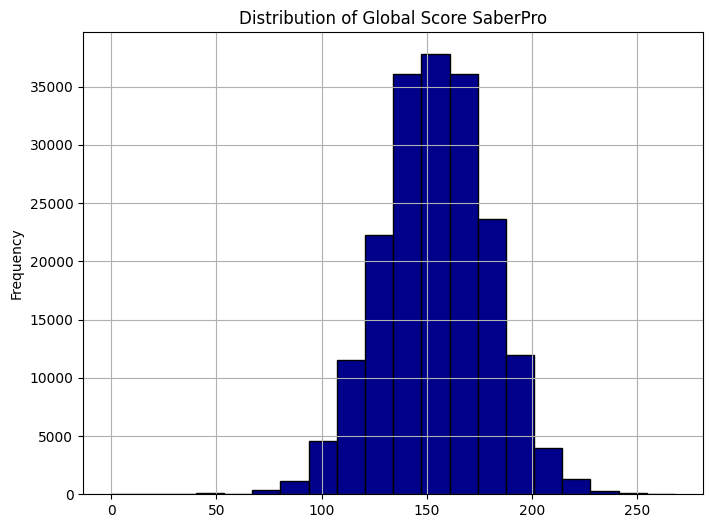

In [ ]:
plt.figure(figsize=(8, 6))
train_data['Global_Score_pro'].plot(kind='hist', bins=20, color='darkblue', edgecolor='black')
plt.title('Distribution of Global Score SaberPro')
plt.xlabel('')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('/content/drive/MyDrive/Images/Global_scoredistribution_1.jpg', dpi=300)
plt.show()

In [ ]:
train_data['Global_Score_pro'].describe()

count    191359.000000
mean        154.109475
std          25.521501
min           0.000000
25%         137.000000
50%         154.000000
75%         172.000000
max         268.000000
Name: Global_Score_pro, dtype: float64

Normality check

In [ ]:
variable = train_data['Global_Score_pro']

kstest_result = stats.kstest(variable, 'norm')

print("Kolmogorov-Smirnov test statistic:", kstest_result.statistic)
print("p-value:", kstest_result.pvalue)

Kolmogorov-Smirnov test statistic: 0.999984322660549
p-value: 0.0


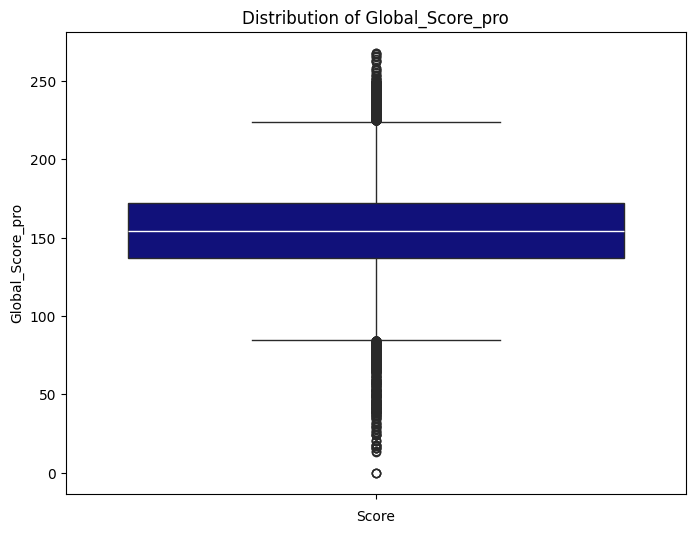

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(y=train_data['Global_Score_pro'], color='darkblue', medianprops=dict(color="white"))

plt.title('Distribution of Global_Score_pro')
plt.xlabel('Score')


plt.savefig('/content/drive/MyDrive/Images/Global_scoredboxplot_1.jpg', dpi=300)
plt.show()

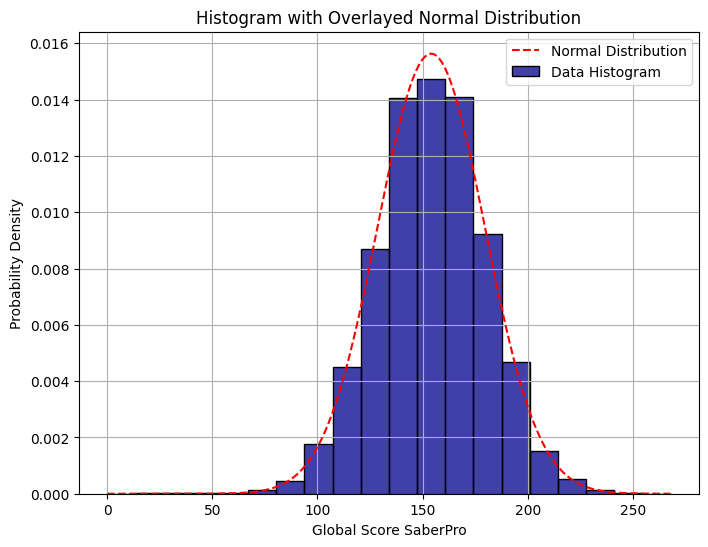

In [ ]:
variable = train_data['Global_Score_pro']

plt.figure(figsize=(8, 6))
sns.histplot(variable, bins=20, color='darkblue', edgecolor='black', kde=False, stat='density', label='Data Histogram')

mean = np.mean(variable)
std_dev = np.std(variable)

x = np.linspace(min(variable), max(variable), 1000)

pdf = norm.pdf(x, mean, std_dev)

plt.plot(x, pdf, color='red', linestyle='--', label='Normal Distribution')

plt.title('Histogram with Overlayed Normal Distribution')
plt.xlabel('Global Score SaberPro')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

plt.savefig('/content/drive/MyDrive/Images/Global_scoredistribution_2.jpg', dpi=300)

plt.show()

Variable creation

In [ ]:
mapping = {
    20212: datetime(2021, 7, 11),
    20203: datetime(2020, 10, 18),
    20195: datetime(2019, 10, 20),
    20194: datetime(2019, 10, 20),
    20213: datetime(2021, 7, 11),
    20202: datetime(2020, 10, 18),
    20196: datetime(2019, 10, 20)
}


train_data['Period'] = train_data['Period'].map(mapping)

In [ ]:
train_data['Period'].value_counts()

Period
2021-07-11    73685
2020-10-18    69799
2019-10-20    47875
Name: count, dtype: int64

In [ ]:
train_data['Date_of_Birth'].describe()

count         191356
unique          3828
top       15/09/1998
freq             225
Name: Date_of_Birth, dtype: object

In [ ]:
from datetime import datetime
train_data['Date_of_Birth'] = pd.to_datetime(train_data['Date_of_Birth'], format='%d/%m/%Y', errors='coerce')

term_dates = {
    '20194': datetime(2019, 10, 20),
    '20196': datetime(2019, 10, 20),
    '20195': datetime(2019, 10, 20),
    '20203': datetime(2020, 10, 18),
    '20202': datetime(2020, 10, 18),
    '20212': datetime(2021, 7, 11),
    '20213': datetime(2021, 7, 11)
}

def calculate_age(row):
    today = term_dates.get(row['Period'], pd.to_datetime('today'))
    return today.year - row['Date_of_Birth'].year - ((today.month, today.day) < (row['Date_of_Birth'].month, row['Date_of_Birth'].day))

train_data['Age'] = train_data.apply(calculate_age, axis=1)

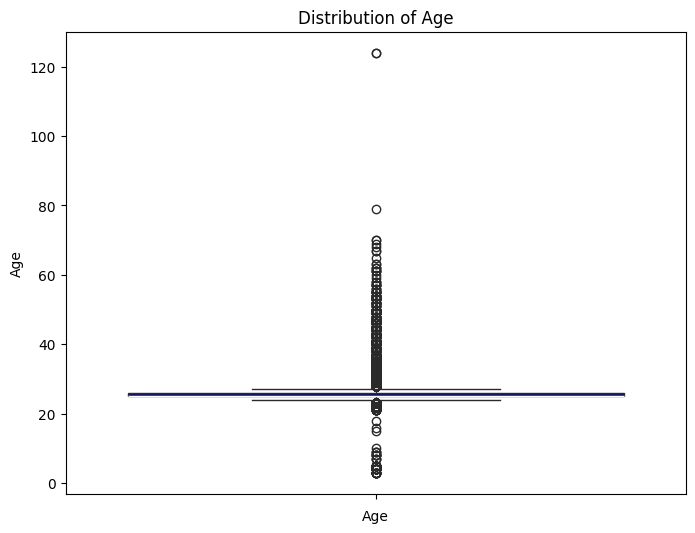

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=train_data['Age'],  color='darkblue', medianprops=dict(color="white"))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.savefig('/content/drive/MyDrive/Images/Age_boxplot_1.jpg', dpi=300)
plt.show()

In [ ]:
train_data['Age'].describe()

count    191352.000000
mean         25.438140
std           1.643823
min           3.000000
25%          25.000000
50%          25.000000
75%          26.000000
max         124.000000
Name: Age, dtype: float64

In [ ]:
mean_age = train_data['Age'].describe()['mean']

In [ ]:
lower_bound = mean_age - 5
upper_bound = mean_age + 5
print(lower_bound, upper_bound)

20.438140181445714 30.438140181445714


In [ ]:
instances_above = sum(train_data['Age'] > upper_bound)
instances_below = sum(train_data['Age'] < lower_bound)

train_data = train_data[(train_data['Age'] >= lower_bound) & (train_data['Age'] <= upper_bound)]

print(f"Number of instances above upper bound: {instances_above}")
print(f"Number of instances below lower bound: {instances_below}")

Number of instances above upper bound: 1168
Number of instances below lower bound: 61


In [ ]:
train_data.drop(['Period', 'Date_of_Birth'], axis=1, inplace=True)

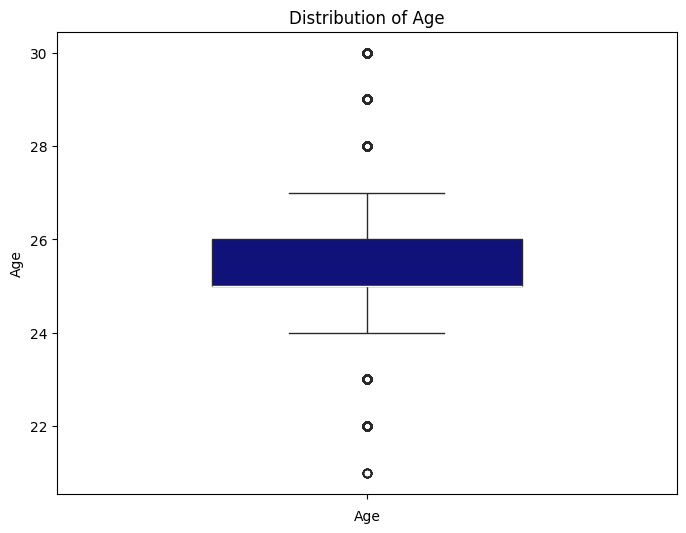

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(y=train_data['Age'], color='darkblue', medianprops=dict(color="white"), width=0.5)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.savefig('/content/drive/MyDrive/Images/Age_boxplot_1.jpg', dpi=300)
plt.show()

In [ ]:
stratum_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0
}

train_data['Housing_Stratum_pro_encode'] = train_data['Housing_Stratum_pro'].map(stratum_mapping)
train_data['Housing_Stratum_encode'] = train_data['Housing_Stratum'].map(stratum_mapping)

In [ ]:
train_data = train_data[train_data['Housing_Stratum_pro_encode'] != 0]
#Droping 668 instances with no information about Stratum

In [ ]:
train_data['Stratum_Change'] = 0

train_data.loc[train_data['Housing_Stratum_encode'] < train_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 1
train_data.loc[train_data['Housing_Stratum_encode'] > train_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 2

train_data['Stratum_Change'].value_counts()

Stratum_Change
0    125670
1     42714
2     21062
Name: count, dtype: int64

In [ ]:
train_data['Computer_Access_Change'] = 0

train_data.loc[(train_data['Computer_Access'] == 'No') & (train_data['Computer_Access_pro'] == 'Si'), 'Computer_Access_Change'] = 1
train_data.loc[(train_data['Computer_Access'] == 'Si') & (train_data['Computer_Access_pro'] == 'No'), 'Computer_Access_Change'] = 2


train_data['Washing_Machine_Access_Change'] = 0

train_data.loc[(train_data['Washing_Machine_Access'] == 'No') & (train_data['Washing_Machine_Access_pro'] == 'Si'), 'Washing_Machine_Access_Change'] = 1
train_data.loc[(train_data['Washing_Machine_Access'] == 'Si') & (train_data['Washing_Machine_Access_pro'] == 'No'), 'Washing_Machine_Access_Change'] = 2


train_data['Car_Access_Change'] = 0

train_data.loc[(train_data['Car_Access'] == 'No') & (train_data['Car_Access_pro'] == 'Si'), 'Car_Access_Change'] = 1
train_data.loc[(train_data['Car_Access'] == 'Si') & (train_data['Car_Access_pro'] == 'No'), 'Car_Access_Change'] = 2

train_data['Internet_Access_Change'] = 0

train_data.loc[(train_data['Internet_Access'] == 'No') & (train_data['Internet_Access_pro'] == 'Si'), 'Internet_Access_Change'] = 1
train_data.loc[(train_data['Internet_Access'] == 'Si') & (train_data['Internet_Access_pro'] == 'No'), 'Internet_Access_Change'] = 2

print(train_data['Computer_Access_Change'].value_counts())
print(train_data['Washing_Machine_Access_Change'].value_counts())
print(train_data['Car_Access_Change'].value_counts())
print (train_data['Internet_Access_Change'].value_counts())

Computer_Access_Change
0    157031
1     25055
2      7360
Name: count, dtype: int64
Washing_Machine_Access_Change
0    156501
1     21133
2     11812
Name: count, dtype: int64
Car_Access_Change
0    147497
1     22380
2     19569
Name: count, dtype: int64
Internet_Access_Change
0    148657
1     35389
2      5400
Name: count, dtype: int64


In [ ]:
weekly_working_hours_mapping = {
    'Más de 30 horas': 'Si, 20 horas o más a la semana',
    'Entre 21 y 30 horas': 'Si, 20 horas o más a la semana',
    '0': 'No',
    'Entre 11 y 20 horas': 'Si, menos de 20 horas a la semana',
    'Menos de 10 horas': 'Si, menos de 20 horas a la semana'
}

train_data['Weekly_Working_Hours_pro'] = train_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)

currently_working_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

weekly_working_hours_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

train_data['Currently_Working'] = train_data['Currently_Working'].map(currently_working_mapping)
train_data['Weekly_Working_Hours_pro'] = train_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)

train_data['Working_Hours_Change'] = 0

train_data.loc[train_data['Currently_Working'] < train_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 1
train_data.loc[train_data['Currently_Working'] > train_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 2

print (train_data['Working_Hours_Change'].value_counts())

Working_Hours_Change
1    133515
0     54234
2      1697
Name: count, dtype: int64


In [ ]:
# Drop the Saber 11 Columns columns
train_data.drop(['Housing_Stratum_encode', 'Housing_Stratum_pro_encode', 'Housing_Stratum', 'Internet_Access', 'Computer_Access', 'Washing_Machine_Access', 'Car_Access', 'Currently_Working'], axis=1, inplace=True)


Missing Values

<ipython-input-83-0435a6da2bbf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentages_sorted.values, y=missing_percentages_sorted.index, palette='cividis')


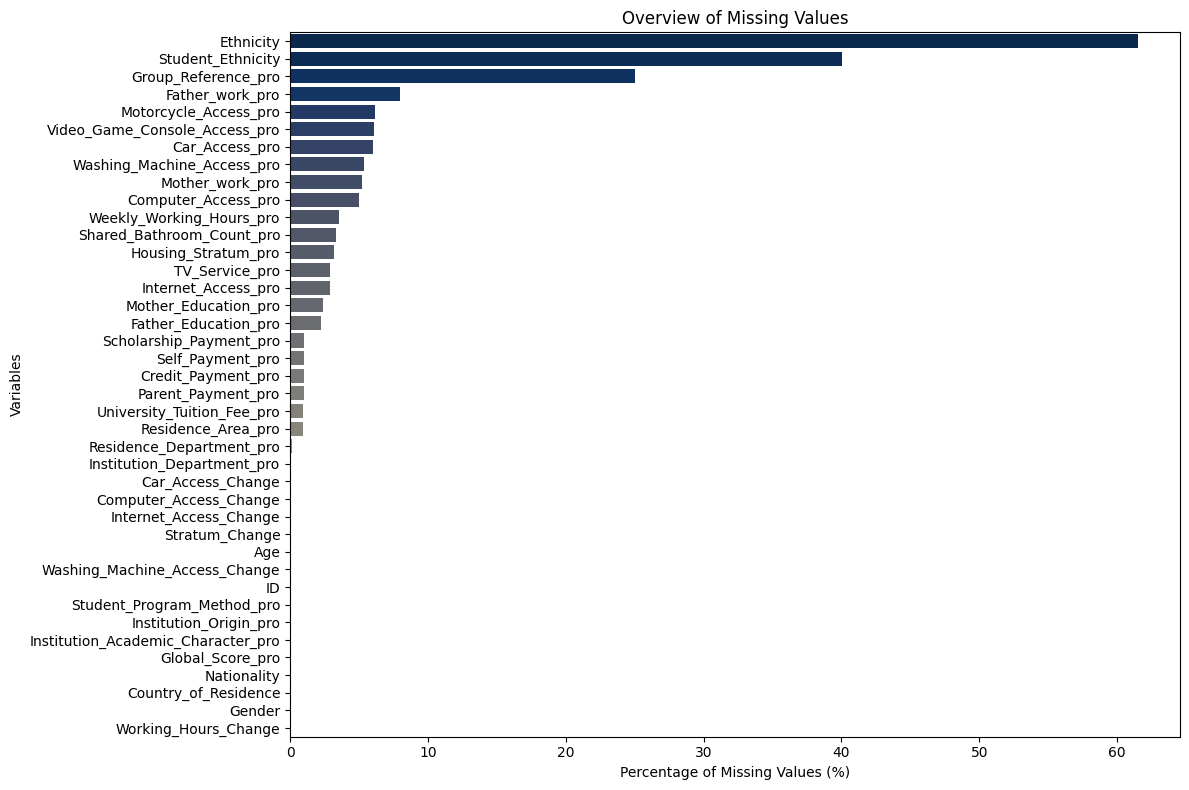

In [ ]:
missing_percentages = (train_data.isnull().mean() * 100).round(2)
missing_percentages_sorted = missing_percentages.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percentages_sorted.values, y=missing_percentages_sorted.index, palette='cividis')
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Variables')
plt.title('Overview of Missing Values')

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Images/missing_values.jpg', dpi=300)
plt.show()

In [ ]:
train_data ['Ethnicity'].value_counts()

Ethnicity
Ninguno                          66472
Otro grupo étnico minoritario     2581
Comunidad afrodescendiente        2065
Zenú                               785
Pasto                              466
Wayúu                              157
Raizal                              76
Paez                                57
Emberá                              56
Cancuamo                            54
Pijao                               53
Inga                                49
Comunidades Rom (Gitanas)           21
Cubeo                               15
Huitoto                             12
Guambiano                            9
Arhuaco                              8
Tucano                               7
Palenquero                           6
Sikuani                              5
Name: count, dtype: int64

In [ ]:
train_data['Ethnicity'].isnull().sum()

116492

In [ ]:
train_data ['Student_Ethnicity'].value_counts()

Student_Ethnicity
No    109669
Si      3848
Name: count, dtype: int64

In [ ]:
# Check if missing values in 'Ethnicity' match with 'No' in 'Student_Ethnicity'
total_missing = train_data['Ethnicity'].isnull().sum()
missing_ethnicity = train_data['Ethnicity'].isnull()
no_student_ethnicity = train_data['Student_Ethnicity'] == 'No'

missing_match_no = missing_ethnicity & no_student_ethnicity
num_matching_missing_no = missing_match_no.sum()

print("Number of matching missing values with 'No':", num_matching_missing_no)

print ("Proportion of missing values in Ethnicity that correspond to 'No' in Student 'Ethnicity':%", (num_matching_missing_no/ total_missing )*100)

Number of matching missing values with 'No': 109523
Proportion of missing values in Ethnicity that correspond to 'No' in Student 'Ethnicity':% 94.01761494351544


In [ ]:
# Replace missing values in 'Ethnicity' with 'Ninguno'
train_data ['Ethnicity'].fillna('Ninguno', inplace=True)

train_data.drop(columns=['Student_Ethnicity'], inplace=True)

In [ ]:
train_data.to_csv('/content/drive/MyDrive/Thesis Dataset/train_set_checkpoint1.csv', index=False)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/train_set_checkpoint1.csv',  low_memory=False)

In [ ]:
dropped_instances = train_data[train_data['Nationality'] != 'COLOMBIA']
count_dropped = len(dropped_instances)
# Keep only instances where Nationality is 'COLOMBIA'
train_data = train_data[train_data['Nationality'] == 'COLOMBIA']
print("Instances dropped:", count_dropped)

Instances dropped: 71


In [ ]:
dropped_instances_residence = train_data[train_data['Country_of_Residence'] != 'COLOMBIA']
count_dropped_residence = len(dropped_instances_residence)
# Keep only instances where Nationality is 'COLOMBIA'
train_data = train_data[train_data['Country_of_Residence'] == 'COLOMBIA']
print("Instances dropped:", count_dropped_residence)

Instances dropped: 0


In [ ]:
# List of desired values/categories
desired_categories = ['BOGOTÁ', 'ANTIOQUIA', 'VALLE', 'CUNDINAMARCA', 'ATLANTICO',
                      'SANTANDER', 'BOLIVAR', 'NORTE SANTANDER', 'BOYACA', 'TOLIMA',
                      'NARIÑO', 'CORDOBA', 'HUILA', 'META', 'CESAR', 'RISARALDA',
                      'SUCRE', 'MAGDALENA', 'CALDAS', 'CAUCA', 'LA GUAJIRA',
                      'QUINDIO', 'CASANARE', 'CAQUETA', 'CHOCO', 'PUTUMAYO',
                      'ARAUCA', 'SAN ANDRES', 'GUAVIARE', 'VICHADA', 'AMAZONAS',
                      'GUAINIA', 'VAUPES']
filtered_data = train_data[train_data['Residence_Department_pro'].isin(desired_categories) | train_data['Residence_Department_pro'].isnull()]
count_dropped = len(train_data) - len(filtered_data)
train_data = filtered_data

print("Instances dropped:", count_dropped)

Instances dropped: 39


Imputing Missing Values

In [ ]:
train_data['Weekly_Working_Hours_pro'] = train_data['Weekly_Working_Hours_pro'].astype('object')

In [ ]:
class CustomSingleImputer(SingleImputer):
    def __init__(self, *args, **kwargs):
        kwargs.setdefault("strategy", "categorical")
        super().__init__(*args, **kwargs)
        self.custom_state = {
            "strategy": kwargs.get("strategy"),
            "seed": kwargs.get("seed", None),
        }

variables_to_impute = train_data.select_dtypes(include='object').columns[train_data.select_dtypes(include='object').isnull().any()]
single_imputer = CustomSingleImputer(strategy={var: 'categorical' for var in variables_to_impute}, seed=123)

train_final = single_imputer.fit_transform(train_data)

with open('imputer.pkl', 'wb') as f:
    pickle.dump(single_imputer.custom_state, f)

with open('imputer.pkl', 'rb') as f:
    imputer_state_loaded = pickle.load(f)

single_imputer_loaded = CustomSingleImputer(strategy=imputer_state_loaded['strategy'], seed=imputer_state_loaded['seed'])

train_final = single_imputer_loaded.fit_transform(train_data)

In [ ]:
missing_values = train_final.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ID                                    0
Nationality                           0
Gender                                0
Country_of_Residence                  0
Ethnicity                             0
Residence_Department_pro              0
Residence_Area_pro                    0
University_Tuition_Fee_pro            0
Scholarship_Payment_pro               0
Credit_Payment_pro                    0
Parent_Payment_pro                    0
Self_Payment_pro                      0
Father_Education_pro                  0
Mother_Education_pro                  0
Father_work_pro                       0
Mother_work_pro                       0
Housing_Stratum_pro                   0
Internet_Access_pro                   0
TV_Service_pro                        0
Computer_Access_pro                   0
Washing_Machine_Access_pro            0
Video_Game_Console_Access_pro         0
Shared_Bathroom_Count_pro             0
Car_Access_pro                        0
Weekly_Working_Hours_pro

In [ ]:
train_final.to_csv('/content/drive/MyDrive/Thesis Dataset/checkpoint_2.csv', index=False)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/checkpoint_2.csv')

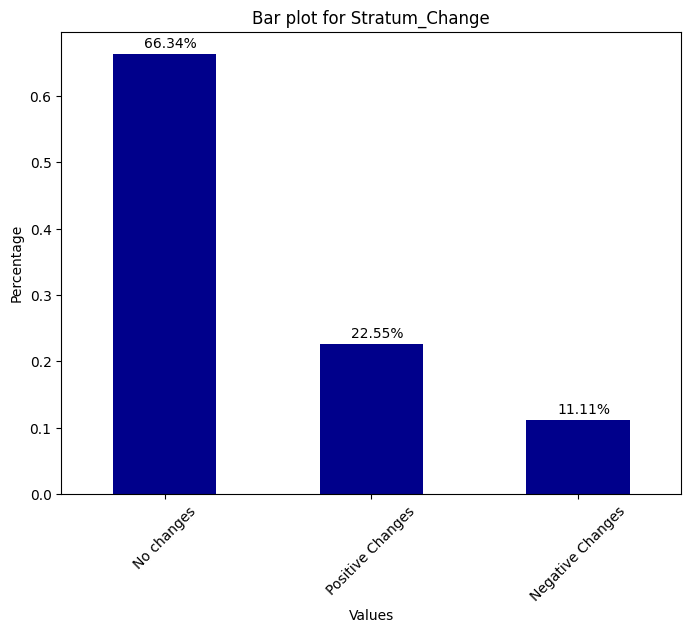

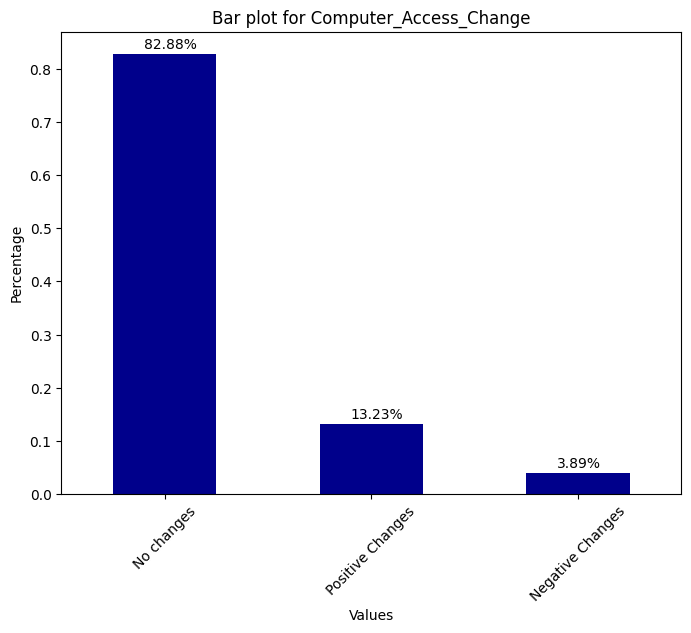

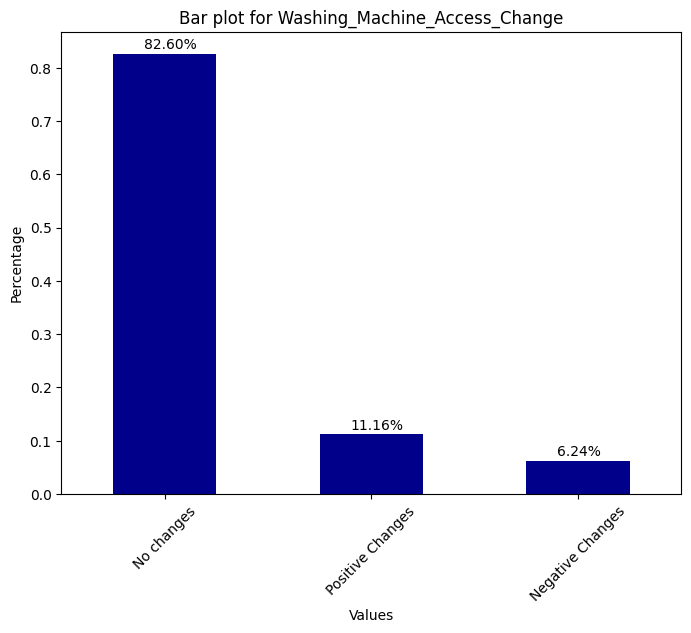

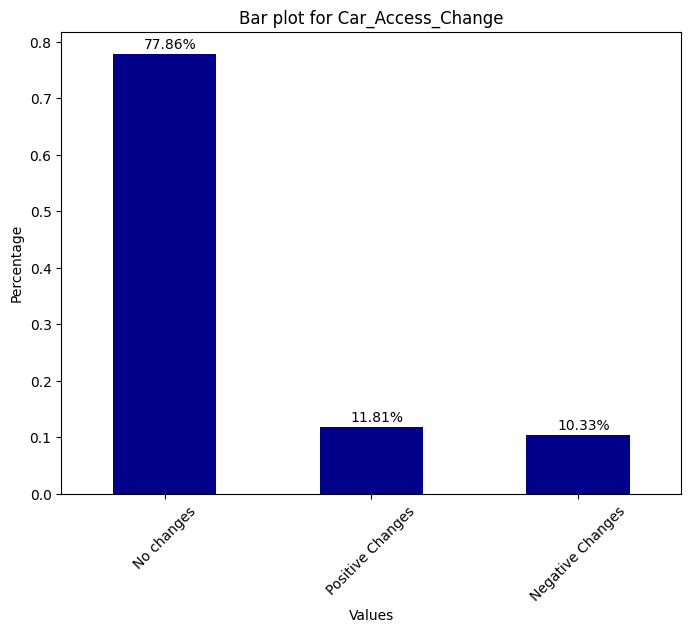

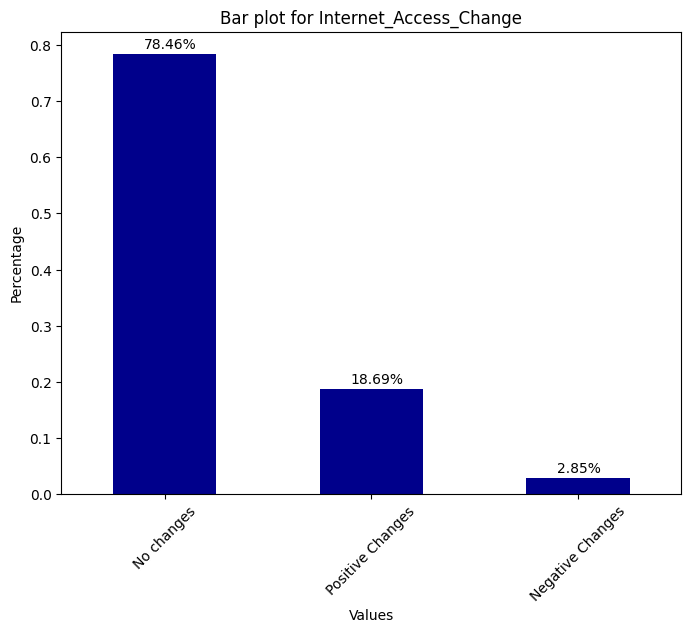

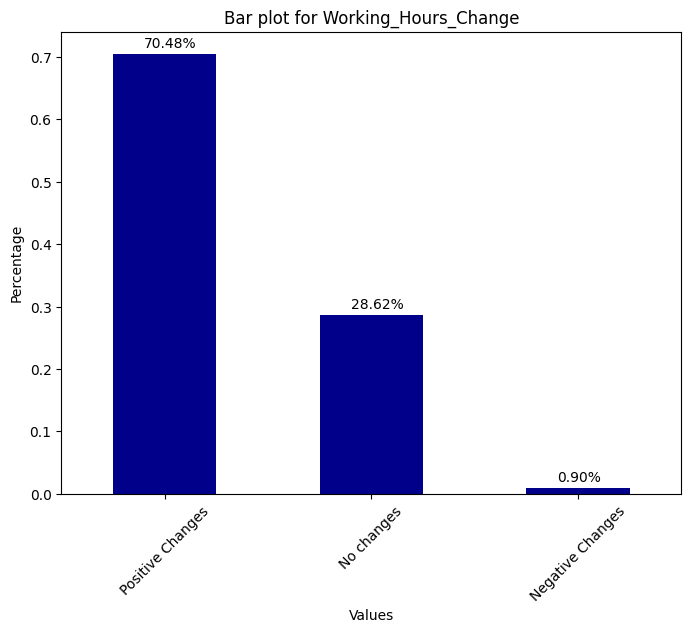

In [ ]:
custom_labels = {0: 'No changes', 1: 'Positive Changes', 2: 'Negative Changes'}

directory = '/content/drive/MyDrive/Images/'
if not os.path.exists(directory):
    os.makedirs(directory)

for column in train_data.columns:
    if 'Change' in column:
        plt.figure(figsize=(8, 6))
        ax = train_data[column].map(custom_labels).value_counts(normalize=True).plot(kind='bar', color='darkblue')
        plt.title(f'Bar plot for {column}')
        plt.xlabel('Values')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)

        for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height())
            x = p.get_x() + p.get_width() / 2 - 0.1
            y = p.get_height() + 0.01
            ax.annotate(percentage, (x, y))

        plt.savefig(os.path.join(directory, f'{column}_graph.jpg'), dpi=300)

        plt.show()

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189336 entries, 0 to 189335
Data columns (total 39 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ID                                  189336 non-null  object 
 1   Nationality                         189336 non-null  object 
 2   Gender                              189336 non-null  object 
 3   Country_of_Residence                189336 non-null  object 
 4   Ethnicity                           189336 non-null  object 
 5   Residence_Department_pro            189336 non-null  object 
 6   Residence_Area_pro                  189336 non-null  object 
 7   University_Tuition_Fee_pro          189336 non-null  object 
 8   Scholarship_Payment_pro             189336 non-null  object 
 9   Credit_Payment_pro                  189336 non-null  object 
 10  Parent_Payment_pro                  189336 non-null  object 
 11  Self_Payment_pro          

Encoding

In [ ]:
columns_to_encode = [col for col in train_data.columns if col not in ['ID', 'Age', 'Global_Score_pro']]

column_transformer_oh = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', drop=None), columns_to_encode)],
    remainder='passthrough'
)

encoded_training_oh = column_transformer_oh.fit_transform(train_data.drop(columns=['ID', 'Age', 'Global_Score_pro']))
feature_names_encoded = list(column_transformer_oh.get_feature_names_out(input_features=columns_to_encode))
dense_matrix = encoded_training_oh.toarray()

encoded_training_df = pd.DataFrame(dense_matrix, columns=feature_names_encoded)

final_training_df = pd.concat([train_data[['ID', 'Age', 'Global_Score_pro']], encoded_training_df], axis=1)

encoder_state = {
    'categories': column_transformer_oh.named_transformers_['one_hot_encoder'].categories_,
    'drop': None,
    'sparse_output': False,
    'dtype': np.float64
}

In [ ]:
print("Shape of final validation DataFrame:", final_training_df.shape)

Shape of final validation DataFrame: (189336, 235)


In [ ]:
final_training_df.isnull().sum()

ID                                           0
Age                                          0
Global_Score_pro                             0
one_hot_encoder__Nationality_COLOMBIA        0
one_hot_encoder__Gender_F                    0
                                            ..
one_hot_encoder__Internet_Access_Change_1    0
one_hot_encoder__Internet_Access_Change_2    0
one_hot_encoder__Working_Hours_Change_0      0
one_hot_encoder__Working_Hours_Change_1      0
one_hot_encoder__Working_Hours_Change_2      0
Length: 235, dtype: int64

In [ ]:
final_training_df.to_csv('/content/drive/MyDrive/Thesis Dataset/training_OH.csv', index=False)

Validation Data Preprocessing

In [ ]:
validation_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/validation_set.csv')

In [ ]:
mapping = {
    20212: datetime(2021, 7, 11),
    20203: datetime(2020, 10, 18),
    20195: datetime(2019, 10, 20),
    20194: datetime(2019, 10, 20),
    20213: datetime(2021, 7, 11),
    20202: datetime(2020, 10, 18),
    20196: datetime(2019, 10, 20)
}

validation_data['Period'] = validation_data['Period'].map(mapping)

In [ ]:
from datetime import datetime
validation_data['Date_of_Birth'] = pd.to_datetime(validation_data['Date_of_Birth'], format='%d/%m/%Y', errors='coerce')

term_dates = {
    '20194': datetime(2019, 10, 20),
    '20196': datetime(2019, 10, 20),
    '20195': datetime(2019, 10, 20),
    '20203': datetime(2020, 10, 18),
    '20202': datetime(2020, 10, 18),
    '20212': datetime(2021, 7, 11),
    '20213': datetime(2021, 7, 11)
}

def calculate_age(row):
    today = term_dates.get(row['Period'], pd.to_datetime('today'))
    return today.year - row['Date_of_Birth'].year - ((today.month, today.day) < (row['Date_of_Birth'].month, row['Date_of_Birth'].day))

validation_data['Age'] = validation_data.apply(calculate_age, axis=1)

In [ ]:
validation_data['Age'].describe()

count    47837.000000
mean        25.439806
std          1.643948
min          3.000000
25%         25.000000
50%         25.000000
75%         26.000000
max        105.000000
Name: Age, dtype: float64

In [ ]:
instances_above = sum(validation_data['Age'] > upper_bound)
instances_below = sum(validation_data['Age'] < lower_bound)

validation_data = validation_data[(validation_data['Age'] >= lower_bound) & (validation_data['Age'] <= upper_bound)]

print(f"Number of instances above upper bound: {instances_above}")
print(f"Number of instances below lower bound: {instances_below}")

Number of instances above upper bound: 276
Number of instances below lower bound: 13


In [ ]:
stratum_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0
}
validation_data['Housing_Stratum_pro_encode'] = validation_data['Housing_Stratum_pro'].map(stratum_mapping)
validation_data['Housing_Stratum_encode'] = validation_data['Housing_Stratum'].map(stratum_mapping)
print (validation_data['Housing_Stratum_encode'].value_counts())
print (validation_data['Housing_Stratum_pro_encode'].value_counts())

Housing_Stratum_encode
2.0    16287
3.0    13170
1.0    10753
4.0     4371
5.0     1757
6.0     1148
Name: count, dtype: int64
Housing_Stratum_pro_encode
2.0    15156
3.0    14201
1.0     7994
4.0     5285
5.0     2080
6.0     1212
0.0      159
Name: count, dtype: int64


In [ ]:
validation_data = validation_data[validation_data['Housing_Stratum_encode'] != 0]
validation_data = validation_data[validation_data['Housing_Stratum_pro_encode'] != 0]

In [ ]:
validation_data['Stratum_Change'] = 0  # Initialize with 0

validation_data.loc[validation_data['Housing_Stratum_encode'] < validation_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 1
validation_data.loc[validation_data['Housing_Stratum_encode'] > validation_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 2


validation_data['Stratum_Change'].value_counts()

Stratum_Change
0    31479
1    10633
2     5277
Name: count, dtype: int64

In [ ]:
validation_data['Computer_Access_Change'] = 0

validation_data.loc[(validation_data['Computer_Access'] == 'No') & (validation_data['Computer_Access_pro'] == 'Si'), 'Computer_Access_Change'] = 1
validation_data.loc[(validation_data['Computer_Access'] == 'Si') & (validation_data['Computer_Access_pro'] == 'No'), 'Computer_Access_Change'] = 2


validation_data['Washing_Machine_Access_Change'] = 0

validation_data.loc[(validation_data['Washing_Machine_Access'] == 'No') & (validation_data['Washing_Machine_Access_pro'] == 'Si'), 'Washing_Machine_Access_Change'] = 1
validation_data.loc[(validation_data['Washing_Machine_Access'] == 'Si') & (validation_data['Washing_Machine_Access_pro'] == 'No'), 'Washing_Machine_Access_Change'] = 2



validation_data['Car_Access_Change'] = 0

validation_data.loc[(validation_data['Car_Access'] == 'No') & (validation_data['Car_Access_pro'] == 'Si'), 'Car_Access_Change'] = 1
validation_data.loc[(validation_data['Car_Access'] == 'Si') & (validation_data['Car_Access_pro'] == 'No'), 'Car_Access_Change'] = 2


validation_data['Internet_Access_Change'] = 0
validation_data.loc[(validation_data['Internet_Access'] == 'No') & (validation_data['Internet_Access_pro'] == 'Si'), 'Internet_Access_Change'] = 1
validation_data.loc[(validation_data['Internet_Access'] == 'Si') & (validation_data['Internet_Access_pro'] == 'No'), 'Internet_Access_Change'] = 2



print(validation_data['Computer_Access_Change'].value_counts())
print(validation_data['Washing_Machine_Access_Change'].value_counts())
print(validation_data['Car_Access_Change'].value_counts())
print (validation_data['Internet_Access_Change'].value_counts())

Computer_Access_Change
0    39208
1     6379
2     1802
Name: count, dtype: int64
Washing_Machine_Access_Change
0    39060
1     5287
2     3042
Name: count, dtype: int64
Car_Access_Change
0    36797
1     5673
2     4919
Name: count, dtype: int64
Internet_Access_Change
0    37246
1     8794
2     1349
Name: count, dtype: int64


In [ ]:
weekly_working_hours_mapping = {
    'Más de 30 horas': 'Si, 20 horas o más a la semana',
    'Entre 21 y 30 horas': 'Si, 20 horas o más a la semana',
    '0': 'No',
    'Entre 11 y 20 horas': 'Si, menos de 20 horas a la semana',
    'Menos de 10 horas': 'Si, menos de 20 horas a la semana'
}

validation_data['Weekly_Working_Hours_pro'] = validation_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)

currently_working_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

weekly_working_hours_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

validation_data['Currently_Working'] = validation_data['Currently_Working'].map(currently_working_mapping)
validation_data['Weekly_Working_Hours_pro'] = validation_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)


validation_data['Working_Hours_Change'] = 0

validation_data.loc[validation_data['Currently_Working'] < validation_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 1
validation_data.loc[validation_data['Currently_Working'] > validation_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 2

print (validation_data['Working_Hours_Change'].value_counts())

Working_Hours_Change
1    33356
0    13629
2      404
Name: count, dtype: int64


In [ ]:
desired_categories_val = ['BOGOTÁ', 'ANTIOQUIA', 'VALLE', 'CUNDINAMARCA', 'ATLANTICO',
                      'SANTANDER', 'BOLIVAR', 'NORTE SANTANDER', 'BOYACA', 'TOLIMA',
                      'NARIÑO', 'CORDOBA', 'HUILA', 'META', 'CESAR', 'RISARALDA',
                      'SUCRE', 'MAGDALENA', 'CALDAS', 'CAUCA', 'LA GUAJIRA',
                      'QUINDIO', 'CASANARE', 'CAQUETA', 'CHOCO', 'PUTUMAYO',
                      'ARAUCA', 'SAN ANDRES', 'GUAVIARE', 'VICHADA', 'AMAZONAS',
                      'GUAINIA', 'VAUPES']

filtered_data_val = validation_data[validation_data['Residence_Department_pro'].isin(desired_categories_val) | validation_data['Residence_Department_pro'].isnull()]

count_dropped = len(validation_data) - len(filtered_data_val)

validation_data = filtered_data_val

print("Instances dropped:", count_dropped)

dropped_instances_residence_val = validation_data[validation_data['Country_of_Residence'] != 'COLOMBIA']
count_dropped_residence_val = len(dropped_instances_residence_val)

validation_data = validation_data[validation_data['Country_of_Residence'] == 'COLOMBIA']

print("Instances dropped:", count_dropped_residence_val)

dropped_instances_val = validation_data[validation_data['Nationality'] != 'COLOMBIA']
count_dropped_val = len(dropped_instances_val)

validation_data = validation_data[validation_data['Nationality'] == 'COLOMBIA']
print("Instances dropped:", count_dropped_val)

Instances dropped: 6
Instances dropped: 23
Instances dropped: 0


In [ ]:
validation_data ['Ethnicity'].fillna('Ninguno', inplace=True)

In [ ]:
validation_data.drop(['Date_of_Birth','Period', 'Internet_Access', 'Computer_Access', 'Washing_Machine_Access', 'Car_Access', 'Currently_Working',
                      'Student_Ethnicity', 'Housing_Stratum_encode', 'Housing_Stratum', 'Housing_Stratum_pro_encode'], axis=1, inplace=True)

In [ ]:
validation_data['Weekly_Working_Hours_pro'] = validation_data['Weekly_Working_Hours_pro'].astype('object')

In [ ]:
variables_to_impute = validation_data.select_dtypes(include='object').columns[validation_data.select_dtypes(include='object').isnull().any()]
single_imputer = SingleImputer(strategy={var: 'categorical' for var in variables_to_impute}, seed=123)
validation_data = single_imputer.fit_transform(validation_data)

In [ ]:
num_instances_before = len(validation_data)
validation_data.dropna(subset=['Age'], inplace=True)
num_instances_after = len(validation_data)
num_instances_dropped = num_instances_before - num_instances_after
print("Number of instances dropped:", num_instances_dropped)

Number of instances dropped: 0


In [ ]:
validation_data.to_csv('/content/drive/MyDrive/Thesis Dataset/validation_imputed.csv', index=False)

In [ ]:
validation_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/validation_imputed.csv', low_memory=False)

In [ ]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47360 entries, 0 to 47359
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  47360 non-null  object 
 1   Nationality                         47360 non-null  object 
 2   Gender                              47360 non-null  object 
 3   Country_of_Residence                47360 non-null  object 
 4   Ethnicity                           47360 non-null  object 
 5   Residence_Department_pro            47360 non-null  object 
 6   Residence_Area_pro                  47360 non-null  object 
 7   University_Tuition_Fee_pro          47360 non-null  object 
 8   Scholarship_Payment_pro             47360 non-null  object 
 9   Credit_Payment_pro                  47360 non-null  object 
 10  Parent_Payment_pro                  47360 non-null  object 
 11  Self_Payment_pro                    47360

OneHotEncoding

In [ ]:
columns_to_encode = [col for col in validation_data.columns if col not in ['ID', 'Age', 'Global_Score_pro']]

column_transformer_oh = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(drop=None), columns_to_encode)],
    remainder='passthrough'
)

encoded_validation_oh = column_transformer_oh.fit_transform(validation_data.drop(columns=['ID', 'Age', 'Global_Score_pro']))
feature_names_encoded = list(column_transformer_oh.get_feature_names_out(input_features=columns_to_encode))
dense_matrix = encoded_validation_oh.toarray()

encoded_validation_df = pd.DataFrame(dense_matrix, columns=feature_names_encoded)
final_validation_df = pd.concat([validation_data[['ID', 'Age', 'Global_Score_pro']], encoded_validation_df], axis=1)
training_columns = set(final_training_df.columns)
validation_columns = set(final_validation_df.columns)
missing_in_validation = training_columns - validation_columns

for col in missing_in_validation:
    final_validation_df[col] = 0

final_validation_df = final_validation_df[final_training_df.columns]
print("Shape of final validation DataFrame:", final_validation_df.shape)

Shape of final validation DataFrame: (47360, 235)


In [ ]:
final_validation_df.isnull().sum()

ID                                           0
Age                                          0
Global_Score_pro                             0
one_hot_encoder__Nationality_COLOMBIA        0
one_hot_encoder__Gender_F                    0
                                            ..
one_hot_encoder__Internet_Access_Change_1    0
one_hot_encoder__Internet_Access_Change_2    0
one_hot_encoder__Working_Hours_Change_0      0
one_hot_encoder__Working_Hours_Change_1      0
one_hot_encoder__Working_Hours_Change_2      0
Length: 235, dtype: int64

In [ ]:
final_validation_df.to_csv('/content/drive/MyDrive/Thesis Dataset/validation_OH.csv', index=False)

In [ ]:
validation_set = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/validation_OH.csv')

In [ ]:
 training_set = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/training_OH.csv')

Test Set Processing

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/test_set', low_memory=False)

In [ ]:
mapping = {
    20212: datetime(2021, 7, 11),
    20203: datetime(2020, 10, 18),
    20195: datetime(2019, 10, 20),
    20194: datetime(2019, 10, 20),
    20213: datetime(2021, 7, 11),
    20202: datetime(2020, 10, 18),
    20196: datetime(2019, 10, 20)
}


test_data['Period'] = test_data['Period'].map(mapping)

In [ ]:

test_data['Date_of_Birth'] = pd.to_datetime(test_data['Date_of_Birth'], format='%d/%m/%Y', errors='coerce')

term_dates = {
    '20194': datetime(2019, 10, 20),
    '20196': datetime(2019, 10, 20),
    '20195': datetime(2019, 10, 20),
    '20203': datetime(2020, 10, 18),
    '20202': datetime(2020, 10, 18),
    '20212': datetime(2021, 7, 11),
    '20213': datetime(2021, 7, 11)
}

def calculate_age(row):
    today = term_dates.get(row['Period'], pd.to_datetime('today'))
    return today.year - row['Date_of_Birth'].year - ((today.month, today.day) < (row['Date_of_Birth'].month, row['Date_of_Birth'].day))

test_data['Age'] = test_data.apply(calculate_age, axis=1)

In [ ]:
test_data = test_data[(test_data['Age'] >= lower_bound) & (test_data['Age'] <= upper_bound)]

In [ ]:
stratum_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0
}

test_data['Housing_Stratum_pro_encode'] = test_data['Housing_Stratum_pro'].map(stratum_mapping)
test_data['Housing_Stratum_encode'] = test_data['Housing_Stratum'].map(stratum_mapping)

In [ ]:
test_data = test_data[test_data['Housing_Stratum_pro_encode'] != 0]

In [ ]:
test_data['Stratum_Change'] = 0

test_data.loc[test_data['Housing_Stratum_encode'] < test_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 1
test_data.loc[test_data['Housing_Stratum_encode'] > test_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 2

test_data['Stratum_Change'].value_counts()

Stratum_Change
0    39353
1    13299
2     6548
Name: count, dtype: int64

In [ ]:
test_data['Computer_Access_Change'] = 0

test_data.loc[(test_data['Computer_Access'] == 'No') & (test_data['Computer_Access_pro'] == 'Si'), 'Computer_Access_Change'] = 1
test_data.loc[(test_data['Computer_Access'] == 'Si') & (test_data['Computer_Access_pro'] == 'No'), 'Computer_Access_Change'] = 2


test_data['Washing_Machine_Access_Change'] = 0

test_data.loc[(test_data['Washing_Machine_Access'] == 'No') & (test_data['Washing_Machine_Access_pro'] == 'Si'), 'Washing_Machine_Access_Change'] = 1
test_data.loc[(test_data['Washing_Machine_Access'] == 'Si') & (test_data['Washing_Machine_Access_pro'] == 'No'), 'Washing_Machine_Access_Change'] = 2

test_data['Car_Access_Change'] = 0

test_data.loc[(test_data['Car_Access'] == 'No') & (test_data['Car_Access_pro'] == 'Si'), 'Car_Access_Change'] = 1
test_data.loc[(test_data['Car_Access'] == 'Si') & (test_data['Car_Access_pro'] == 'No'), 'Car_Access_Change'] = 2


test_data['Internet_Access_Change'] = 0

test_data.loc[(test_data['Internet_Access'] == 'No') & (test_data['Internet_Access_pro'] == 'Si'), 'Internet_Access_Change'] = 1
test_data.loc[(test_data['Internet_Access'] == 'Si') & (test_data['Internet_Access_pro'] == 'No'), 'Internet_Access_Change'] = 2

print(test_data['Computer_Access_Change'].value_counts())
print(test_data['Washing_Machine_Access_Change'].value_counts())
print(test_data['Car_Access_Change'].value_counts())
print (test_data['Internet_Access_Change'].value_counts())

Computer_Access_Change
0    48831
1     7992
2     2377
Name: count, dtype: int64
Washing_Machine_Access_Change
0    48791
1     6617
2     3792
Name: count, dtype: int64
Car_Access_Change
0    46025
1     6948
2     6227
Name: count, dtype: int64
Internet_Access_Change
0    46463
1    11123
2     1614
Name: count, dtype: int64


In [ ]:

weekly_working_hours_mapping = {
    'Más de 30 horas': 'Si, 20 horas o más a la semana',
    'Entre 21 y 30 horas': 'Si, 20 horas o más a la semana',
    '0': 'No',
    'Entre 11 y 20 horas': 'Si, menos de 20 horas a la semana',
    'Menos de 10 horas': 'Si, menos de 20 horas a la semana'
}

test_data['Weekly_Working_Hours_pro'] = test_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)

currently_working_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

weekly_working_hours_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

test_data['Currently_Working'] = test_data['Currently_Working'].map(currently_working_mapping)
test_data['Weekly_Working_Hours_pro'] = test_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)


test_data['Working_Hours_Change'] = 0

test_data.loc[test_data['Currently_Working'] < test_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 1
test_data.loc[test_data['Currently_Working'] > test_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 2

print (test_data['Working_Hours_Change'].value_counts())

Working_Hours_Change
1    41770
0    16900
2      530
Name: count, dtype: int64


In [ ]:
desired_categories_test = ['BOGOTÁ', 'ANTIOQUIA', 'VALLE', 'CUNDINAMARCA', 'ATLANTICO',
                      'SANTANDER', 'BOLIVAR', 'NORTE SANTANDER', 'BOYACA', 'TOLIMA',
                      'NARIÑO', 'CORDOBA', 'HUILA', 'META', 'CESAR', 'RISARALDA',
                      'SUCRE', 'MAGDALENA', 'CALDAS', 'CAUCA', 'LA GUAJIRA',
                      'QUINDIO', 'CASANARE', 'CAQUETA', 'CHOCO', 'PUTUMAYO',
                      'ARAUCA', 'SAN ANDRES', 'GUAVIARE', 'VICHADA', 'AMAZONAS',
                      'GUAINIA', 'VAUPES']

filtered_data_test = test_data[test_data['Residence_Department_pro'].isin(desired_categories_test) | test_data['Residence_Department_pro'].isnull()]

count_dropped = len(test_data) - len(filtered_data_test)


test_data = filtered_data_test

print("Instances dropped:", count_dropped)

dropped_instances_residence_test = test_data[test_data['Country_of_Residence'] != 'COLOMBIA']
count_dropped_residence_val = len(dropped_instances_residence_test)

test_data = test_data[test_data['Country_of_Residence'] == 'COLOMBIA']

print("Instances dropped:", count_dropped_residence_val)

dropped_instances_val = test_data[test_data['Nationality'] != 'COLOMBIA']
count_dropped_val = len(dropped_instances_val)

test_data = test_data[test_data['Nationality'] == 'COLOMBIA']
print("Instances dropped:", count_dropped_val)

Instances dropped: 9
Instances dropped: 31
Instances dropped: 0


In [ ]:
test_data ['Ethnicity'].fillna('Ninguno', inplace=True)

In [ ]:
test_data.drop(['Date_of_Birth','Period', 'Internet_Access', 'Computer_Access', 'Washing_Machine_Access', 'Car_Access', 'Currently_Working',
                      'Student_Ethnicity', 'Housing_Stratum_encode', 'Housing_Stratum', 'Housing_Stratum_pro_encode'], axis=1, inplace=True)

In [ ]:
test_data['Weekly_Working_Hours_pro'] = test_data['Weekly_Working_Hours_pro'].astype('object')

In [ ]:
test_final = single_imputer_loaded.transform(test_data)

In [ ]:
test_final.to_csv('/content/drive/MyDrive/Thesis Dataset/test_checkpoint.csv', index=False)

In [ ]:
test_final = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/test_checkpoint.csv', low_memory=False)

In [ ]:
columns_to_encode_test = [col for col in test_final.columns if col not in ['ID', 'Age', 'Global_Score_pro']]

columns_to_encode_test = [col for col in columns_to_encode_test if col in columns_to_encode]

encoded_test_oh = column_transformer_oh.transform(test_final[columns_to_encode_test])

feature_names_encoded = list(column_transformer_oh.get_feature_names_out(input_features=columns_to_encode_test))

dense_matrix_test = encoded_test_oh.toarray()

encoded_test_df = pd.DataFrame(dense_matrix_test, columns=feature_names_encoded)

final_test_df = pd.concat([test_final[['ID', 'Age', 'Global_Score_pro']], encoded_test_df], axis=1)

encoded_test_df = final_test_df[training_set.columns]

print("Shape of final test DataFrame:", final_test_df.shape)

Shape of final test DataFrame: (59160, 235)


In [ ]:
training_columns = set(training_set.columns)
test_columns = set(encoded_test_df.columns)

columns_only_in_test = test_columns - training_columns

columns_only_in_training = training_columns - test_columns

print("Columns present only in final_test_df:")
print(columns_only_in_test)

print("\nColumns present only in final_training_df:")
print(columns_only_in_training)


Columns present only in final_test_df:
set()

Columns present only in final_training_df:
set()


In [ ]:
encoded_test_df.to_csv('/content/drive/MyDrive/Thesis Dataset/test_OH.csv', index=False)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/checkpoint_2.csv')

In [ ]:
validation_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/validation_imputed.csv', low_memory=False)

In [ ]:
def convert_columns_to_object(df):
    columns_to_convert = [col for col in df.columns if col not in ['Age', 'Global_Score_pro']]
    df[columns_to_convert] = df[columns_to_convert].astype('object')
    return df

train_data = convert_columns_to_object(train_data)
test_final = convert_columns_to_object(test_final)
validation_data = convert_columns_to_object(validation_data)


In [ ]:
train_data['Global_Score_pro'].describe()

count    189336.000000
mean        154.257922
std          25.464483
min           0.000000
25%         137.000000
50%         154.000000
75%         172.000000
max         268.000000
Name: Global_Score_pro, dtype: float64

**LeaveOneOutEncoding**

In [ ]:
X_train = train_data
X_valid = validation_data
X_test = test_final


y_train = X_train['Global_Score_pro']

categorical_columns = [col for col in X_train.columns if col not in ['ID', 'Global_Score_pro', 'Age']]

cat_encoder = LeaveOneOutEncoder()

cat_encoder.fit(X_train[categorical_columns], y_train)

X_train_encoded = X_train.copy()
X_train_encoded[categorical_columns] = cat_encoder.transform(X_train[categorical_columns])

X_valid_encoded = X_valid.copy()
X_valid_encoded[categorical_columns] = cat_encoder.transform(X_valid[categorical_columns])

X_test_encoded = X_test.copy()
X_test_encoded[categorical_columns] = cat_encoder.transform(X_test[categorical_columns])


In [ ]:
X_train_encoded.to_csv("/content/drive/MyDrive/Thesis Dataset/train_OLeave.csv", index=False)
X_valid_encoded.to_csv("/content/drive/MyDrive/Thesis Dataset/valid_OLeave.csv", index=False)
X_test_encoded.to_csv("/content/drive/MyDrive/Thesis Dataset/test_OLeave.csv", index=False)


In [ ]:
X_train_df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/train_OLeave.csv')
X_valid_df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/valid_OLeave.csv')
X_test_df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/test_OLeave.csv')

Label Encoding

In [ ]:
X_train_label = train_data
X_valid_label = validation_data
X_test_label = test_final

y_train_label = X_train_label['Global_Score_pro']

categorical_columns = [col for col in X_train_label.columns if col not in ['ID', 'Global_Score_pro', 'Age']]

label_encoder = LabelEncoder()

for col in categorical_columns:
    X_train_label[col] = label_encoder.fit_transform(X_train_label[col])
    X_valid_label[col] = label_encoder.transform(X_valid_label[col])
    X_test_label[col] = label_encoder.transform(X_test_label[col])


print("Encoded Training Data:")
print(X_train_label.head())
print("\nEncoded Validation Data:")
print(X_valid_label.head())
print("\nEncoded Test Data:")
print(X_test_label.head())

Encoded Training Data:
               ID  Nationality  Gender  Country_of_Residence  Ethnicity  \
0  EK202030087022            0       0                     0          9   
1  EK202030093763            0       0                     0          9   
2  EK202120215853            0       1                     0          9   
3  EK202120292000            0       1                     0          9   
4  EK202120185798            0       0                     0          9   

   Residence_Department_pro  Residence_Area_pro  University_Tuition_Fee_pro  \
0                         3                   1                           6   
1                         4                   1                           6   
2                        20                   1                           3   
3                         1                   1                           7   
4                        14                   1                           1   

   Scholarship_Payment_pro  Credit_Payment_pro  ...

In [ ]:
X_train_label.to_csv("/content/drive/MyDrive/Thesis Dataset/train_label.csv", index=False)
X_valid_label.to_csv("/content/drive/MyDrive/Thesis Dataset/valid_label.csv", index=False)
X_test_label.to_csv("/content/drive/MyDrive/Thesis Dataset/test_label.csv", index=False)

Distribution checking

In [ ]:
train_check =  pd.read_csv('/content/drive/MyDrive/Thesis Dataset/checkpoint_2.csv')

In [ ]:
validation_check = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/validation_imputed.csv', low_memory=False)

In [ ]:
train_check ['Global_Score_pro'].describe()

count    189336.000000
mean        154.257922
std          25.464483
min           0.000000
25%         137.000000
50%         154.000000
75%         172.000000
max         268.000000
Name: Global_Score_pro, dtype: float64

In [ ]:
validation_check ['Global_Score_pro'].describe()

count    47360.000000
mean       154.521685
std         25.528526
min         13.000000
25%        137.000000
50%        155.000000
75%        172.000000
max        268.000000
Name: Global_Score_pro, dtype: float64

In [ ]:
train_check ['Global_Score_pro'].describe()

count    189336.000000
mean        154.257922
std          25.464483
min           0.000000
25%         137.000000
50%         154.000000
75%         172.000000
max         268.000000
Name: Global_Score_pro, dtype: float64

In [ ]:
validation_counts_change = validation_check['Stratum_Change'].value_counts(normalize=True) * 100
train_counts_change = train_check['Stratum_Change'].value_counts(normalize=True) * 100


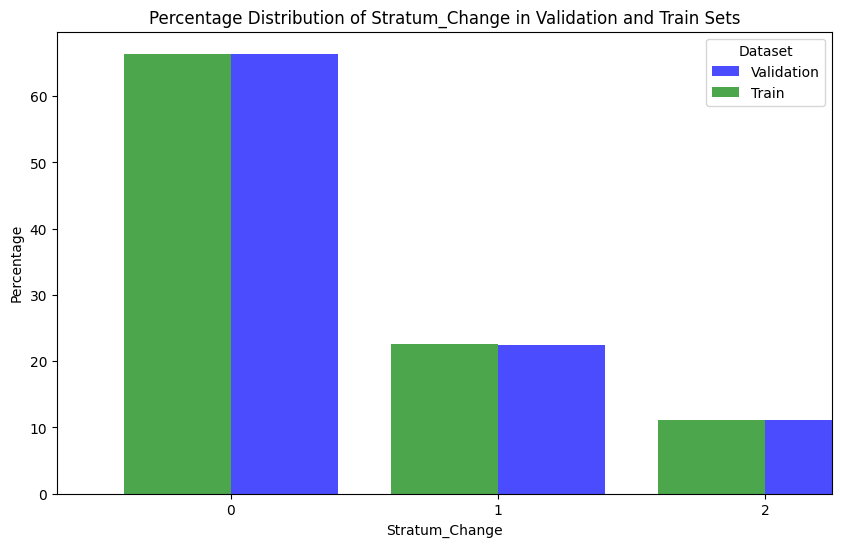

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot validation percentages
validation_counts_change.plot(kind='bar', alpha=0.7, color='blue', position=0, width=0.4, label='Validation', ax=ax)

# Plot train percentages
train_counts_change.plot(kind='bar', alpha=0.7, color='green', position=1, width=0.4, label='Train', ax=ax)

# Customizing the plot
plt.title('Percentage Distribution of Stratum_Change in Validation and Train Sets')
plt.xlabel('Stratum_Change')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Dataset')

plt.show()

In [ ]:
validation_counts= validation_check['Housing_Stratum_pro'].value_counts(normalize=True) * 100
train_counts= train_check['Housing_Stratum_pro'].value_counts(normalize=True) * 100


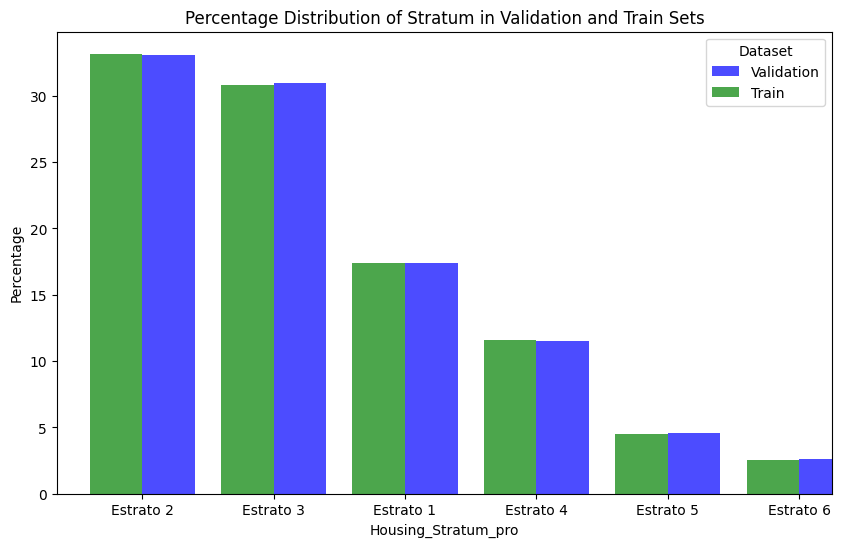

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot validation percentages
validation_counts.plot(kind='bar', alpha=0.7, color='blue', position=0, width=0.4, label='Validation', ax=ax)

# Plot train percentages
train_counts.plot(kind='bar', alpha=0.7, color='green', position=1, width=0.4, label='Train', ax=ax)

# Customizing the plot
plt.title('Percentage Distribution of Stratum in Validation and Train Sets')
plt.xlabel('Housing_Stratum_pro')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Dataset')

plt.show()

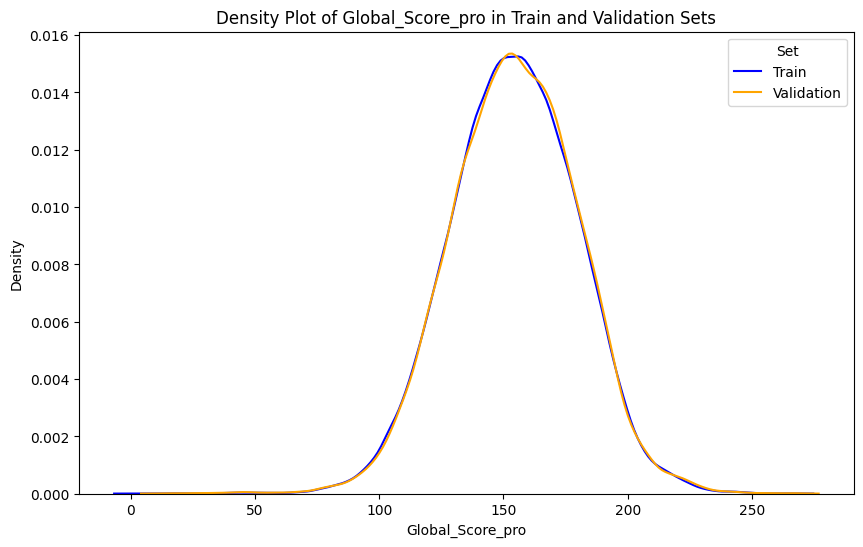

In [ ]:
# Target Variable distributions
plt.figure(figsize=(10, 6))

sns.kdeplot(train_check['Global_Score_pro'], color='blue', label='Train', fill=False)
sns.kdeplot(validation_check['Global_Score_pro'], color='orange', label='Validation', fill=False)

plt.title('Density Plot of Global_Score_pro in Train and Validation Sets')
plt.xlabel('Global_Score_pro')
plt.ylabel('Density')
plt.legend(title='Set')
plt.show()

In [ ]:
validation_check ['Age'].describe()

count    47643.000000
mean        25.361039
std          1.642819
min          2.000000
25%         25.000000
50%         25.000000
75%         26.000000
max        105.000000
Name: Age, dtype: float64

Stratified Splitting

In [ ]:
thesis_data.isna().sum()

ID                                         0
Nationality                                0
Gender                                    14
Date_of_Birth                              4
Period                                     0
Country_of_Residence                       0
Ethnicity                             183500
Residence_Department_pro                 508
Residence_Area_pro                      2711
University_Tuition_Fee_pro              2889
Scholarship_Payment_pro                 2983
Credit_Payment_pro                      2967
Parent_Payment_pro                      2926
Self_Payment_pro                        2991
Father_Education_pro                    6716
Mother_Education_pro                    7055
Father_work_pro                        23805
Mother_work_pro                        15555
Housing_Stratum_pro                     9510
Internet_Access_pro                     8555
TV_Service_pro                          8612
Computer_Access_pro                    15042
Washing_Ma

In [ ]:
# Replace missing values in 'Ethnicity' with 'Ninguno'
thesis_data ['Ethnicity'].fillna('Ninguno', inplace=True)

thesis_data.drop(columns=['Student_Ethnicity'], inplace=True)

<ipython-input-48-6d21cb6059d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thesis_data ['Ethnicity'].fillna('Ninguno', inplace=True)
<ipython-input-48-6d21cb6059d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thesis_data.drop(columns=['Student_Ethnicity'], inplace=True)


In [ ]:
dropped_instances = thesis_data[thesis_data['Nationality'] != 'COLOMBIA']
count_dropped = len(dropped_instances)
# Keep only instances where Nationality is 'COLOMBIA'
thesis_data = thesis_data[thesis_data['Nationality'] == 'COLOMBIA']
print("Instances dropped:", count_dropped)

Instances dropped: 128


In [ ]:
dropped_instances_residence = thesis_data[thesis_data['Country_of_Residence'] != 'COLOMBIA']
count_dropped_residence = len(dropped_instances_residence)
# Keep only instances where Nationality is 'COLOMBIA'
thesis_data = thesis_data[thesis_data['Country_of_Residence'] == 'COLOMBIA']
print("Instances dropped:", count_dropped_residence)

Instances dropped: 0


In [ ]:
# List of desired values/categories
desired_categories = ['BOGOTÁ', 'ANTIOQUIA', 'VALLE', 'CUNDINAMARCA', 'ATLANTICO',
                      'SANTANDER', 'BOLIVAR', 'NORTE SANTANDER', 'BOYACA', 'TOLIMA',
                      'NARIÑO', 'CORDOBA', 'HUILA', 'META', 'CESAR', 'RISARALDA',
                      'SUCRE', 'MAGDALENA', 'CALDAS', 'CAUCA', 'LA GUAJIRA',
                      'QUINDIO', 'CASANARE', 'CAQUETA', 'CHOCO', 'PUTUMAYO',
                      'ARAUCA', 'SAN ANDRES', 'GUAVIARE', 'VICHADA', 'AMAZONAS',
                      'GUAINIA', 'VAUPES']
filtered_data = thesis_data[thesis_data['Residence_Department_pro'].isin(desired_categories) | thesis_data['Residence_Department_pro'].isnull()]
count_dropped = len(thesis_data) - len(filtered_data)
thesis_data = filtered_data

print("Instances dropped:", count_dropped)

Instances dropped: 58


In [ ]:
thesis_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 298813 entries, 34 to 298998
Data columns (total 40 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   ID                                  298813 non-null  object
 1   Nationality                         298813 non-null  object
 2   Gender                              298799 non-null  object
 3   Date_of_Birth                       298809 non-null  object
 4   Period                              298813 non-null  int64 
 5   Country_of_Residence                298813 non-null  object
 6   Ethnicity                           298813 non-null  object
 7   Residence_Department_pro            298305 non-null  object
 8   Residence_Area_pro                  296162 non-null  object
 9   University_Tuition_Fee_pro          295984 non-null  object
 10  Scholarship_Payment_pro             295890 non-null  object
 11  Credit_Payment_pro                  295906 

In [ ]:
class CustomSingleImputer(SingleImputer):
    def __init__(self, *args, **kwargs):
        kwargs.setdefault("strategy", "categorical")
        super().__init__(*args, **kwargs)
        self.custom_state = {
            "strategy": kwargs.get("strategy"),
            "seed": kwargs.get("seed", None),
        }

variables_to_impute = thesis_data.select_dtypes(include='object').columns[thesis_data.select_dtypes(include='object').isnull().any()]
single_imputer = CustomSingleImputer(strategy={var: 'categorical' for var in variables_to_impute}, seed=123)

thesis_data = single_imputer.fit_transform(thesis_data)

with open('imputer.pkl', 'wb') as f:
    pickle.dump(single_imputer.custom_state, f)

with open('imputer.pkl', 'rb') as f:
    imputer_state_loaded = pickle.load(f)

single_imputer_loaded = CustomSingleImputer(strategy=imputer_state_loaded['strategy'], seed=imputer_state_loaded['seed'])

thesis_data_final = single_imputer_loaded.fit_transform(thesis_data)

In [ ]:
from sklearn.model_selection import train_test_split

# Perform initial train-test split
train_data, test_data = train_test_split(thesis_data, test_size=0.2, stratify=thesis_data['Housing_Stratum'], random_state=42)

# Further split the training data into train_data_final and validation_data
train_data_final, validation_data = train_test_split(train_data, test_size=0.2, stratify=train_data['Housing_Stratum'], random_state=42)

# Print the shapes to verify the split
print(f"train_data_final shape: {train_data_final.shape}, validation_data shape: {validation_data.shape}, test_data shape: {test_data.shape}")

train_data_final shape: (191240, 40), validation_data shape: (47810, 40), test_data shape: (59763, 40)


In [ ]:
train_data_final.to_csv('/content/drive/MyDrive/Thesis Dataset/stratified_train.csv', index=False)
validation_data.to_csv('/content/drive/MyDrive/Thesis Dataset/stratified_val.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/Thesis Dataset/stratified_test.csv', index=False)

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_train.csv')
validation_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_val.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_test.csv')

Train Data Preprocessing

In [ ]:
mapping = {
    20212: datetime(2021, 7, 11),
    20203: datetime(2020, 10, 18),
    20195: datetime(2019, 10, 20),
    20194: datetime(2019, 10, 20),
    20213: datetime(2021, 7, 11),
    20202: datetime(2020, 10, 18),
    20196: datetime(2019, 10, 20)
}

train_data['Period'] = train_data['Period'].map(mapping)

In [ ]:
from datetime import datetime
train_data['Date_of_Birth'] = pd.to_datetime(train_data['Date_of_Birth'], format='%d/%m/%Y', errors='coerce')

term_dates = {
    '20194': datetime(2019, 10, 20),
    '20196': datetime(2019, 10, 20),
    '20195': datetime(2019, 10, 20),
    '20203': datetime(2020, 10, 18),
    '20202': datetime(2020, 10, 18),
    '20212': datetime(2021, 7, 11),
    '20213': datetime(2021, 7, 11)
}

def calculate_age(row):
    today = term_dates.get(row['Period'], pd.to_datetime('today'))
    return today.year - row['Date_of_Birth'].year - ((today.month, today.day) < (row['Date_of_Birth'].month, row['Date_of_Birth'].day))

train_data['Age'] = train_data.apply(calculate_age, axis=1)

In [ ]:
mean_age = train_data['Age'].describe()['mean']

In [ ]:
lower_bound = mean_age - 5
upper_bound = mean_age + 5
print(lower_bound, upper_bound)

20.396889954680386 30.396889954680386


In [ ]:
instances_above = sum(train_data['Age'] > upper_bound)
instances_below = sum(train_data['Age'] < lower_bound)

train_data = train_data[(train_data['Age'] >= lower_bound) & (train_data['Age'] <= upper_bound)]

print(f"Number of instances above upper bound: {instances_above}")
print(f"Number of instances below lower bound: {instances_below}")

Number of instances above upper bound: 1145
Number of instances below lower bound: 52


In [ ]:
train_data.drop(['Period', 'Date_of_Birth'], axis=1, inplace=True)

In [ ]:
stratum_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0
}

train_data['Housing_Stratum_pro_encode'] = train_data['Housing_Stratum_pro'].map(stratum_mapping)
train_data['Housing_Stratum_encode'] = train_data['Housing_Stratum'].map(stratum_mapping)

In [ ]:
train_data = train_data[train_data['Housing_Stratum_pro_encode'] != 0]

In [ ]:
train_data['Stratum_Change'] = 0

train_data.loc[train_data['Housing_Stratum_encode'] < train_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 1
train_data.loc[train_data['Housing_Stratum_encode'] > train_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 2

train_data['Stratum_Change'].value_counts()

Stratum_Change
0    120977
1     45333
2     23012
Name: count, dtype: int64

In [ ]:
train_data['Computer_Access_Change'] = 0

train_data.loc[(train_data['Computer_Access'] == 'No') & (train_data['Computer_Access_pro'] == 'Si'), 'Computer_Access_Change'] = 1
train_data.loc[(train_data['Computer_Access'] == 'Si') & (train_data['Computer_Access_pro'] == 'No'), 'Computer_Access_Change'] = 2


train_data['Washing_Machine_Access_Change'] = 0

train_data.loc[(train_data['Washing_Machine_Access'] == 'No') & (train_data['Washing_Machine_Access_pro'] == 'Si'), 'Washing_Machine_Access_Change'] = 1
train_data.loc[(train_data['Washing_Machine_Access'] == 'Si') & (train_data['Washing_Machine_Access_pro'] == 'No'), 'Washing_Machine_Access_Change'] = 2


train_data['Car_Access_Change'] = 0

train_data.loc[(train_data['Car_Access'] == 'No') & (train_data['Car_Access_pro'] == 'Si'), 'Car_Access_Change'] = 1
train_data.loc[(train_data['Car_Access'] == 'Si') & (train_data['Car_Access_pro'] == 'No'), 'Car_Access_Change'] = 2

train_data['Internet_Access_Change'] = 0

train_data.loc[(train_data['Internet_Access'] == 'No') & (train_data['Internet_Access_pro'] == 'Si'), 'Internet_Access_Change'] = 1
train_data.loc[(train_data['Internet_Access'] == 'Si') & (train_data['Internet_Access_pro'] == 'No'), 'Internet_Access_Change'] = 2

print(train_data['Computer_Access_Change'].value_counts())
print(train_data['Washing_Machine_Access_Change'].value_counts())
print(train_data['Car_Access_Change'].value_counts())
print (train_data['Internet_Access_Change'].value_counts())

Computer_Access_Change
0    154365
1     26966
2      7991
Name: count, dtype: int64
Washing_Machine_Access_Change
0    153250
1     22908
2     13164
Name: count, dtype: int64
Car_Access_Change
0    141723
1     25577
2     22022
Name: count, dtype: int64
Internet_Access_Change
0    146987
1     36720
2      5615
Name: count, dtype: int64


In [ ]:
weekly_working_hours_mapping = {
    'Más de 30 horas': 'Si, 20 horas o más a la semana',
    'Entre 21 y 30 horas': 'Si, 20 horas o más a la semana',
    '0': 'No',
    'Entre 11 y 20 horas': 'Si, menos de 20 horas a la semana',
    'Menos de 10 horas': 'Si, menos de 20 horas a la semana'
}

train_data['Weekly_Working_Hours_pro'] = train_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)

currently_working_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

weekly_working_hours_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

train_data['Currently_Working'] = train_data['Currently_Working'].map(currently_working_mapping)
train_data['Weekly_Working_Hours_pro'] = train_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)

train_data['Working_Hours_Change'] = 0

train_data.loc[train_data['Currently_Working'] < train_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 1
train_data.loc[train_data['Currently_Working'] > train_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 2

print (train_data['Working_Hours_Change'].value_counts())

Working_Hours_Change
1    138509
0     49000
2      1813
Name: count, dtype: int64


In [ ]:
# Drop the Saber 11 Columns columns
train_data.drop(['Housing_Stratum_encode', 'Housing_Stratum_pro_encode', 'Housing_Stratum', 'Internet_Access', 'Computer_Access', 'Washing_Machine_Access', 'Car_Access', 'Currently_Working'], axis=1, inplace=True)

In [ ]:
train_data.to_csv('/content/drive/MyDrive/Thesis Dataset/stratified_train_checkpoint.csv', index=False)

Validation Data Preprocessing

In [ ]:
mapping = {
    20212: datetime(2021, 7, 11),
    20203: datetime(2020, 10, 18),
    20195: datetime(2019, 10, 20),
    20194: datetime(2019, 10, 20),
    20213: datetime(2021, 7, 11),
    20202: datetime(2020, 10, 18),
    20196: datetime(2019, 10, 20)
}

validation_data['Period'] = validation_data['Period'].map(mapping)

In [ ]:
from datetime import datetime
validation_data['Date_of_Birth'] = pd.to_datetime(validation_data['Date_of_Birth'], format='%d/%m/%Y', errors='coerce')

term_dates = {
    '20194': datetime(2019, 10, 20),
    '20196': datetime(2019, 10, 20),
    '20195': datetime(2019, 10, 20),
    '20203': datetime(2020, 10, 18),
    '20202': datetime(2020, 10, 18),
    '20212': datetime(2021, 7, 11),
    '20213': datetime(2021, 7, 11)
}

def calculate_age(row):
    today = term_dates.get(row['Period'], pd.to_datetime('today'))
    return today.year - row['Date_of_Birth'].year - ((today.month, today.day) < (row['Date_of_Birth'].month, row['Date_of_Birth'].day))

validation_data['Age'] = validation_data.apply(calculate_age, axis=1)

In [ ]:
mean_age = validation_data['Age'].describe()['mean']

In [ ]:
lower_bound = mean_age - 5
upper_bound = mean_age + 5
print(lower_bound, upper_bound)

20.468740195360706 30.468740195360706


In [ ]:
instances_above = sum(validation_data['Age'] > upper_bound)
instances_below = sum(validation_data['Age'] < lower_bound)

validation_data = validation_data[(validation_data['Age'] >= lower_bound) & (validation_data['Age'] <= upper_bound)]

print(f"Number of instances above upper bound: {instances_above}")
print(f"Number of instances below lower bound: {instances_below}")

Number of instances above upper bound: 310
Number of instances below lower bound: 11


In [ ]:
validation_data.drop(['Period', 'Date_of_Birth'], axis=1, inplace=True)

In [ ]:
stratum_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0
}

validation_data['Housing_Stratum_pro_encode'] = validation_data['Housing_Stratum_pro'].map(stratum_mapping)
validation_data['Housing_Stratum_encode'] = validation_data['Housing_Stratum'].map(stratum_mapping)

In [ ]:
validation_data = validation_data[validation_data['Housing_Stratum_pro_encode'] != 0]

In [ ]:
validation_data['Stratum_Change'] = 0

validation_data.loc[validation_data['Housing_Stratum_encode'] < validation_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 1
validation_data.loc[validation_data['Housing_Stratum_encode'] > validation_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 2

validation_data['Stratum_Change'].value_counts()

Stratum_Change
0    30279
1    11374
2     5689
Name: count, dtype: int64

In [ ]:
validation_data['Computer_Access_Change'] = 0

validation_data.loc[(validation_data['Computer_Access'] == 'No') & (validation_data['Computer_Access_pro'] == 'Si'), 'Computer_Access_Change'] = 1
validation_data.loc[(validation_data['Computer_Access'] == 'Si') & (validation_data['Computer_Access_pro'] == 'No'), 'Computer_Access_Change'] = 2


validation_data['Washing_Machine_Access_Change'] = 0

validation_data.loc[(validation_data['Washing_Machine_Access'] == 'No') & (validation_data['Washing_Machine_Access_pro'] == 'Si'), 'Washing_Machine_Access_Change'] = 1
validation_data.loc[(validation_data['Washing_Machine_Access'] == 'Si') & (validation_data['Washing_Machine_Access_pro'] == 'No'), 'Washing_Machine_Access_Change'] = 2


validation_data['Car_Access_Change'] = 0

validation_data.loc[(validation_data['Car_Access'] == 'No') & (validation_data['Car_Access_pro'] == 'Si'), 'Car_Access_Change'] = 1
validation_data.loc[(validation_data['Car_Access'] == 'Si') & (validation_data['Car_Access_pro'] == 'No'), 'Car_Access_Change'] = 2

validation_data['Internet_Access_Change'] = 0

validation_data.loc[(validation_data['Internet_Access'] == 'No') & (validation_data['Internet_Access_pro'] == 'Si'), 'Internet_Access_Change'] = 1
validation_data.loc[(validation_data['Internet_Access'] == 'Si') & (validation_data['Internet_Access_pro'] == 'No'), 'Internet_Access_Change'] = 2

print(validation_data['Computer_Access_Change'].value_counts())
print(validation_data['Washing_Machine_Access_Change'].value_counts())
print(validation_data['Car_Access_Change'].value_counts())
print (validation_data['Internet_Access_Change'].value_counts())

Computer_Access_Change
0    38519
1     6841
2     1982
Name: count, dtype: int64
Washing_Machine_Access_Change
0    38235
1     5921
2     3186
Name: count, dtype: int64
Car_Access_Change
0    35344
1     6534
2     5464
Name: count, dtype: int64
Internet_Access_Change
0    36718
1     9209
2     1415
Name: count, dtype: int64


In [ ]:
weekly_working_hours_mapping = {
    'Más de 30 horas': 'Si, 20 horas o más a la semana',
    'Entre 21 y 30 horas': 'Si, 20 horas o más a la semana',
    '0': 'No',
    'Entre 11 y 20 horas': 'Si, menos de 20 horas a la semana',
    'Menos de 10 horas': 'Si, menos de 20 horas a la semana'
}

validation_data['Weekly_Working_Hours_pro'] = validation_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)

currently_working_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

weekly_working_hours_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

validation_data['Currently_Working'] = validation_data['Currently_Working'].map(currently_working_mapping)
validation_data['Weekly_Working_Hours_pro'] = validation_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)

validation_data['Working_Hours_Change'] = 0

validation_data.loc[validation_data['Currently_Working'] < validation_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 1
validation_data.loc[validation_data['Currently_Working'] > validation_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 2

print (validation_data['Working_Hours_Change'].value_counts())

Working_Hours_Change
1    34734
0    12161
2      447
Name: count, dtype: int64


In [ ]:
# Drop the Saber 11 Columns columns
validation_data.drop(['Housing_Stratum_encode', 'Housing_Stratum_pro_encode', 'Housing_Stratum', 'Internet_Access', 'Computer_Access', 'Washing_Machine_Access', 'Car_Access', 'Currently_Working'], axis=1, inplace=True)

In [ ]:
validation_data.to_csv('/content/drive/MyDrive/Thesis Dataset/stratified_val_checkpoint.csv', index=False)

Test set Preprocessing

In [ ]:
mapping = {
    20212: datetime(2021, 7, 11),
    20203: datetime(2020, 10, 18),
    20195: datetime(2019, 10, 20),
    20194: datetime(2019, 10, 20),
    20213: datetime(2021, 7, 11),
    20202: datetime(2020, 10, 18),
    20196: datetime(2019, 10, 20)
}


test_data['Period'] = test_data['Period'].map(mapping)

In [ ]:
test_data['Date_of_Birth'] = pd.to_datetime(test_data['Date_of_Birth'], format='%d/%m/%Y', errors='coerce')

term_dates = {
    '20194': datetime(2019, 10, 20),
    '20196': datetime(2019, 10, 20),
    '20195': datetime(2019, 10, 20),
    '20203': datetime(2020, 10, 18),
    '20202': datetime(2020, 10, 18),
    '20212': datetime(2021, 7, 11),
    '20213': datetime(2021, 7, 11)
}

def calculate_age(row):
    today = term_dates.get(row['Period'], pd.to_datetime('today'))
    return today.year - row['Date_of_Birth'].year - ((today.month, today.day) < (row['Date_of_Birth'].month, row['Date_of_Birth'].day))

test_data['Age'] = test_data.apply(calculate_age, axis=1)

In [ ]:
test_data.drop(['Period', 'Date_of_Birth'], axis=1, inplace=True)

In [ ]:
test_data = test_data[(test_data['Age'] >= lower_bound) & (test_data['Age'] <= upper_bound)]

In [ ]:
stratum_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': 0
}

test_data['Housing_Stratum_pro_encode'] = test_data['Housing_Stratum_pro'].map(stratum_mapping)
test_data['Housing_Stratum_encode'] = test_data['Housing_Stratum'].map(stratum_mapping)

In [ ]:
test_data = test_data[test_data['Housing_Stratum_pro_encode'] != 0]

In [ ]:
test_data['Stratum_Change'] = 0

test_data.loc[test_data['Housing_Stratum_encode'] < test_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 1
test_data.loc[test_data['Housing_Stratum_encode'] > test_data['Housing_Stratum_pro_encode'], 'Stratum_Change'] = 2

test_data['Stratum_Change'].value_counts()

Stratum_Change
0    37856
1    14042
2     7246
Name: count, dtype: int64

In [ ]:
test_data['Computer_Access_Change'] = 0

test_data.loc[(test_data['Computer_Access'] == 'No') & (test_data['Computer_Access_pro'] == 'Si'), 'Computer_Access_Change'] = 1
test_data.loc[(test_data['Computer_Access'] == 'Si') & (test_data['Computer_Access_pro'] == 'No'), 'Computer_Access_Change'] = 2


test_data['Washing_Machine_Access_Change'] = 0

test_data.loc[(test_data['Washing_Machine_Access'] == 'No') & (test_data['Washing_Machine_Access_pro'] == 'Si'), 'Washing_Machine_Access_Change'] = 1
test_data.loc[(test_data['Washing_Machine_Access'] == 'Si') & (test_data['Washing_Machine_Access_pro'] == 'No'), 'Washing_Machine_Access_Change'] = 2


test_data['Car_Access_Change'] = 0

test_data.loc[(test_data['Car_Access'] == 'No') & (test_data['Car_Access_pro'] == 'Si'), 'Car_Access_Change'] = 1
test_data.loc[(test_data['Car_Access'] == 'Si') & (test_data['Car_Access_pro'] == 'No'), 'Car_Access_Change'] = 2

test_data['Internet_Access_Change'] = 0

test_data.loc[(test_data['Internet_Access'] == 'No') & (test_data['Internet_Access_pro'] == 'Si'), 'Internet_Access_Change'] = 1
test_data.loc[(test_data['Internet_Access'] == 'Si') & (test_data['Internet_Access_pro'] == 'No'), 'Internet_Access_Change'] = 2

print(test_data['Computer_Access_Change'].value_counts())
print(test_data['Washing_Machine_Access_Change'].value_counts())
print(test_data['Car_Access_Change'].value_counts())
print (test_data['Internet_Access_Change'].value_counts())

Computer_Access_Change
0    48248
1     8405
2     2491
Name: count, dtype: int64
Washing_Machine_Access_Change
0    47968
1     7190
2     3986
Name: count, dtype: int64
Car_Access_Change
0    44376
1     7935
2     6833
Name: count, dtype: int64
Internet_Access_Change
0    45728
1    11537
2     1879
Name: count, dtype: int64


In [ ]:
weekly_working_hours_mapping = {
    'Más de 30 horas': 'Si, 20 horas o más a la semana',
    'Entre 21 y 30 horas': 'Si, 20 horas o más a la semana',
    '0': 'No',
    'Entre 11 y 20 horas': 'Si, menos de 20 horas a la semana',
    'Menos de 10 horas': 'Si, menos de 20 horas a la semana'
}

test_data['Weekly_Working_Hours_pro'] = test_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)

currently_working_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

weekly_working_hours_mapping = {
    'No': 0,
    'Si, menos de 20 horas a la semana': 1,
    'Si, 20 horas o más a la semana': 2
}

test_data['Currently_Working'] = test_data['Currently_Working'].map(currently_working_mapping)
test_data['Weekly_Working_Hours_pro'] = test_data['Weekly_Working_Hours_pro'].map(weekly_working_hours_mapping)

test_data['Working_Hours_Change'] = 0

test_data.loc[test_data['Currently_Working'] < test_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 1
test_data.loc[test_data['Currently_Working'] > test_data['Weekly_Working_Hours_pro'], 'Working_Hours_Change'] = 2

print (test_data['Working_Hours_Change'].value_counts())

Working_Hours_Change
1    43394
0    15216
2      534
Name: count, dtype: int64


In [ ]:
# Drop the Saber 11 Columns columns
test_data.drop(['Housing_Stratum_encode', 'Housing_Stratum_pro_encode', 'Housing_Stratum', 'Internet_Access', 'Computer_Access', 'Washing_Machine_Access', 'Car_Access', 'Currently_Working'], axis=1, inplace=True)

In [ ]:
test_data.to_csv('/content/drive/MyDrive/Thesis Dataset/stratified_test_checkpoint.csv', index=False)

Encoding

One Hot Encoding

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_train_checkpoint.csv')
validation_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_val_checkpoint.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_test_checkpoint.csv')

In [ ]:
columns_to_encode = [col for col in train_data.columns if col not in ['ID', 'Age', 'Global_Score_pro']]

column_transformer_oh = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', drop=None), columns_to_encode)],
    remainder='passthrough'
)

encoded_training_oh = column_transformer_oh.fit_transform(train_data.drop(columns=['ID', 'Age', 'Global_Score_pro']))
feature_names_encoded = list(column_transformer_oh.get_feature_names_out(input_features=columns_to_encode))
dense_matrix = encoded_training_oh.toarray()

encoded_training_df = pd.DataFrame(dense_matrix, columns=feature_names_encoded)

final_training_df = pd.concat([train_data[['ID', 'Age', 'Global_Score_pro']], encoded_training_df], axis=1)

encoder_state = {
    'categories': column_transformer_oh.named_transformers_['one_hot_encoder'].categories_,
    'drop': None,
    'sparse_output': False,
    'dtype': np.float64
}

In [ ]:
columns_to_encode = [col for col in validation_data.columns if col not in ['ID', 'Age', 'Global_Score_pro']]

column_transformer_oh = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(drop=None), columns_to_encode)],
    remainder='passthrough'
)

encoded_validation_oh = column_transformer_oh.fit_transform(validation_data.drop(columns=['ID', 'Age', 'Global_Score_pro']))
feature_names_encoded = list(column_transformer_oh.get_feature_names_out(input_features=columns_to_encode))
dense_matrix = encoded_validation_oh.toarray()

encoded_validation_df = pd.DataFrame(dense_matrix, columns=feature_names_encoded)
final_validation_df = pd.concat([validation_data[['ID', 'Age', 'Global_Score_pro']], encoded_validation_df], axis=1)
training_columns = set(final_training_df.columns)
validation_columns = set(final_validation_df.columns)
missing_in_validation = training_columns - validation_columns

for col in missing_in_validation:
    final_validation_df[col] = 0

final_validation_df = final_validation_df[final_training_df.columns]
print("Shape of final validation DataFrame:", final_validation_df.shape)

Shape of final validation DataFrame: (47342, 235)


In [ ]:
columns_to_encode_test = [col for col in test_data.columns if col not in ['ID', 'Age', 'Global_Score_pro']]

columns_to_encode_test = [col for col in columns_to_encode_test if col in columns_to_encode]

encoded_test_oh = column_transformer_oh.transform(test_data[columns_to_encode_test])

feature_names_encoded = list(column_transformer_oh.get_feature_names_out(input_features=columns_to_encode_test))

dense_matrix_test = encoded_test_oh.toarray()

encoded_test_df = pd.DataFrame(dense_matrix_test, columns=feature_names_encoded)

final_test_df = pd.concat([test_data[['ID', 'Age', 'Global_Score_pro']], encoded_test_df], axis=1)

encoded_test_df = final_test_df[final_training_df.columns]

print("Shape of final test DataFrame:", final_test_df.shape)

Shape of final test DataFrame: (59144, 235)


In [ ]:
final_training_df.to_csv('/content/drive/MyDrive/Thesis Dataset/stratified_train_oh.csv', index=False)
final_validation_df.to_csv('/content/drive/MyDrive/Thesis Dataset/stratified_val_oh.csv', index=False)
final_test_df.to_csv('/content/drive/MyDrive/Thesis Dataset/stratified_test_oh.csv', index=False)

Leave One Out Encoding

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_train_checkpoint.csv')
validation_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_val_checkpoint.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_test_checkpoint.csv')

In [ ]:
X_train = train_data
X_valid = validation_data
X_test = test_data


y_train = X_train['Global_Score_pro']

categorical_columns = [col for col in X_train.columns if col not in ['ID', 'Global_Score_pro', 'Age']]

cat_encoder = LeaveOneOutEncoder()

cat_encoder.fit(X_train[categorical_columns], y_train)

X_train_encoded = X_train.copy()
X_train_encoded[categorical_columns] = cat_encoder.transform(X_train[categorical_columns])

X_valid_encoded = X_valid.copy()
X_valid_encoded[categorical_columns] = cat_encoder.transform(X_valid[categorical_columns])

X_test_encoded = X_test.copy()
X_test_encoded[categorical_columns] = cat_encoder.transform(X_test[categorical_columns])

In [ ]:
X_train_encoded.to_csv("/content/drive/MyDrive/Thesis Dataset/stratified_train_OLeave.csv", index=False)
X_valid_encoded.to_csv("/content/drive/MyDrive/Thesis Dataset/stratified_valid_OLeave.csv", index=False)
X_test_encoded.to_csv("/content/drive/MyDrive/Thesis Dataset/stratified_test_OLeave.csv", index=False)


Label Encoding

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_train_checkpoint.csv')
validation_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_val_checkpoint.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/stratified_test_checkpoint.csv')

In [ ]:
X_train_label = train_data
X_valid_label = validation_data
X_test_label = test_data

y_train_label = X_train_label['Global_Score_pro']

categorical_columns = [col for col in X_train_label.columns if col not in ['ID', 'Global_Score_pro', 'Age']]

label_encoder = LabelEncoder()

for col in categorical_columns:
    X_train_label[col] = label_encoder.fit_transform(X_train_label[col])
    X_valid_label[col] = label_encoder.transform(X_valid_label[col])
    X_test_label[col] = label_encoder.transform(X_test_label[col])


print("Encoded Training Data:")
print(X_train_label.head())
print("\nEncoded Validation Data:")
print(X_valid_label.head())
print("\nEncoded Test Data:")
print(X_test_label.head())

Encoded Training Data:
               ID  Nationality  Gender  Country_of_Residence  Ethnicity  \
0  EK202120199967            0       1                     0          9   
1  EK202120152152            0       1                     0          9   
2  EK202030121757            0       0                     0          9   
3  EK202030084451            0       1                     0          9   
4  EK202120224897            0       1                     0          9   

   Residence_Department_pro  Residence_Area_pro  University_Tuition_Fee_pro  \
0                         4                   1                           2   
1                         1                   1                           3   
2                         4                   1                           6   
3                         4                   1                           1   
4                        27                   1                           0   

   Scholarship_Payment_pro  Credit_Payment_pro  ...

In [ ]:
X_train_label.to_csv("/content/drive/MyDrive/Thesis Dataset/stratified_train_label.csv", index=False)
X_valid_label.to_csv("/content/drive/MyDrive/Thesis Dataset/stratifiedvalid_label.csv", index=False)
X_test_label.to_csv("/content/drive/MyDrive/Thesis Dataset/stratifiedtest_label.csv", index=False)